# Problem Statement

### Build a regression model to predict the count of total rental bikes that includes both casual and registered users based on the given attributes, such as season, year, month, hour, holiday, weekday, working day, weather situation, normalized temperature, normalized feeling temperature, normalized humidity, normalized wind speed, count of casual users, and number of registered users.


# Main Goal

### The main objective is to develop a predictive model that can estimate total bike fare rates based on various factors such as weather, time of day, day of week, etc. This can be useful for businesses or bike sharing service providers to improve their efficiency, understand demand patterns and plan resources accordingly. Since the model is the regression model so, the count of total rental bikes would be the target variable.


# Attributes Information


- 	    Instant:	Index number

-       Dteday: 	Date (Format: YYYY-MM-DD)

-	    Season: 	Season Name

-	    Yr:     	Year

-	    Month:  	Month (1-12)(Jan-Dec)

-	    Hr:     	Hour(0 to 23)

-	    Holiday: 	Whether the holiday is there or not

-	    Weekday:	Day of the week

-	    Workingday:	Whether it is a working day or not

-	    Weathersit:	Weather situation

-	    Temp:   	Normalized temperature in Celsius

-	    Atemp:	    Normalized feeling temperature

-	    Hum:	    Normalized humidity. The Values are divided by 100

-	    Windspeed:	Normalized Wind speed. Values are divided by 67

-	    Casual:	    Count of casual users

-	    Registered:	Number of registered users

-   	Cnt:	    Count of total rental biked including both casual and registered


 ### Let us import all the basic modules we will be needing for this project.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

pandas - used to perform data manipulation and analysis

numpy - used to perform a wide variety of mathematical operations on arrays

seaborn - built on top of matplotlib with similar functionalities

matplotlib - used for data visualization and graphical plotting

warnings - to manipulate warnings details 

The train_test_split- function from the sklearn.model_selection module is used to split a dataset into two separate datasets for training and testing a machine learning model. 

The LabelEncoder- class from the sklearn.preprocessing module is used to transform categorical labels into numerical labels.

The RandomForestRegressor- class from the sklearn.ensemble module is used for regression tasks in machine learning. 

The r2_score function- from the sklearn.metrics module is used to evaluate the performance of a regression model by calculating the coefficient of determination.

# Exploratory Data Analysis

### Loading the Dataset

In [2]:
df= pd.read_csv("bike_rent.csv")

In [3]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,springer,2011,1,0,No,6,No work,Clear,0.24,0.2879,0.81,0,3,13,16
1,2,01-01-2011,springer,2011,1,1,No,6,No work,Clear,0.22,0.2727,0.8,0,8,32,40
2,3,01-01-2011,springer,2011,1,2,No,6,No work,Clear,0.22,0.2727,?,0,5,27,32
3,4,01-01-2011,springer,2011,1,3,No,6,No work,Clear,0.24,0.2879,0.75,0,3,10,13
4,5,01-01-2011,springer,2011,1,4,No,6,No work,Clear,0.24,0.2879,0.75,0,0,1,1


In [4]:
warnings.filterwarnings("ignore")

- filterwarnings('ignore') is to ignore the warnings thrown by the modules (gives clean results)

In [5]:
df.shape


(17379, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   instant     17379 non-null  int64 
 1   dteday      17379 non-null  object
 2   season      17379 non-null  object
 3   yr          17379 non-null  object
 4   mnth        17379 non-null  object
 5   hr          17379 non-null  int64 
 6   holiday     17379 non-null  object
 7   weekday     17379 non-null  int64 
 8   workingday  17379 non-null  object
 9   weathersit  17379 non-null  object
 10  temp        17379 non-null  object
 11  atemp       17379 non-null  object
 12  hum         17379 non-null  object
 13  windspeed   17379 non-null  object
 14  casual      17379 non-null  object
 15  registered  17379 non-null  object
 16  cnt         17379 non-null  int64 
dtypes: int64(4), object(13)
memory usage: 2.3+ MB


In [7]:
df.dtypes

instant        int64
dteday        object
season        object
yr            object
mnth          object
hr             int64
holiday       object
weekday        int64
workingday    object
weathersit    object
temp          object
atemp         object
hum           object
windspeed     object
casual        object
registered    object
cnt            int64
dtype: object

In [8]:
# statistical info
df.describe()

,instant,hr,weekday,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000
mean,8690.0000,11.546752,3.003683,189.463088
std,5017.0295,6.914405,2.005771,181.387599
min,1.0000,0.000000,0.000000,1.000000
25%,4345.5000,6.000000,1.000000,40.000000
50%,8690.0000,12.000000,3.000000,142.000000
75%,13034.5000,18.000000,5.000000,281.000000
max,17379.0000,23.000000,6.000000,977.000000


In [9]:
# unique values
df.apply(lambda x: len(x.unique()))

instant       17379
dteday          731
season            5
yr                3
mnth             13
hr               24
holiday           3
weekday           7
workingday        3
weathersit        5
temp             51
atemp            66
hum              90
windspeed        31
casual          323
registered      777
cnt             869
dtype: int64

Attributes containing many unique values are of numerical type. The remaining attributes are of categorical type.

### Preprocessing the dataset

Data preprocessing refers to preparing (cleaning and organizing) the raw data to make it suitable for building and training Machine Learning models.

### Checking duplicate

In [10]:
df_dup = df.copy()
# checking for duplicates and droping the entire duplicate row if any 
df_dup.drop_duplicates(subset = None, inplace = True)

In [11]:
df_dup.shape

(17379, 17)

In [12]:
df.shape

(17379, 17)

In [13]:
df.duplicated().sum()

0

- The shape after running the drop duplicate command is same as original dataframe Hence we can conclude that there was zero duplicate values in th dataset

In [14]:
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,springer,2011,1,0,No,6,No work,Clear,0.24,0.2879,0.81,0,3,13,16
1,2,01-01-2011,springer,2011,1,1,No,6,No work,Clear,0.22,0.2727,0.8,0,8,32,40
2,3,01-01-2011,springer,2011,1,2,No,6,No work,Clear,0.22,0.2727,?,0,5,27,32
3,4,01-01-2011,springer,2011,1,3,No,6,No work,Clear,0.24,0.2879,0.75,0,3,10,13
4,5,01-01-2011,springer,2011,1,4,No,6,No work,Clear,0.24,0.2879,0.75,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,31-12-2012,springer,2012,12,19,No,1,Working Day,Mist,0.26,0.2576,0.6,0.1642,11,108,119
17375,17376,31-12-2012,springer,2012,12,20,No,1,Working Day,Mist,0.26,0.2576,0.6,0.1642,8,81,89
17376,17377,31-12-2012,springer,2012,12,21,No,1,Working Day,Clear,?,0.2576,0.6,0.1642,7,83,90
17377,17378,31-12-2012,springer,2012,12,22,No,1,Working Day,Clear,0.26,0.2727,0.56,0.1343,13,48,61


Check for missing data

### Missing value analysis

In [15]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

we can see  0 for missing data in each column, but after looking at to dataset there some unknown data with  "?". So now to detect it as a missing data we are  replacing "?" with NaN

In [16]:
df.replace("?", float(np.nan), inplace=True)

In [17]:
# Now check for missing data

df.isnull().sum()

instant        0
dteday         0
season         6
yr             1
mnth           1
hr             0
holiday        1
weekday        0
workingday     5
weathersit     4
temp          11
atemp          6
hum            6
windspeed      5
casual         1
registered     1
cnt            0
dtype: int64

- we can now observe that there is some NaN values in dataset so now will try to do analysis on NaN values

### Renaming the columns

In [18]:
# for easy understanding let us rename the columns as below:

df.rename(columns={'instant':'id',
                       'dteday':'datetime',
                       'yr':'year',
                       'hr':'hour',
                       'mnth':'month',
                       'weathersit':'weather',
                       'hum':'humidity',
                       'cnt':'count'},inplace=True)

In [19]:
df

,id,datetime,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2011,springer,2011,1,0,No,6,No work,Clear,0.24,0.2879,0.81,0,3,13,16
1,2,01-01-2011,springer,2011,1,1,No,6,No work,Clear,0.22,0.2727,0.8,0,8,32,40
2,3,01-01-2011,springer,2011,1,2,No,6,No work,Clear,0.22,0.2727,NaN,0,5,27,32
3,4,01-01-2011,springer,2011,1,3,No,6,No work,Clear,0.24,0.2879,0.75,0,3,10,13
4,5,01-01-2011,springer,2011,1,4,No,6,No work,Clear,0.24,0.2879,0.75,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,31-12-2012,springer,2012,12,19,No,1,Working Day,Mist,0.26,0.2576,0.6,0.1642,11,108,119
17375,17376,31-12-2012,springer,2012,12,20,No,1,Working Day,Mist,0.26,0.2576,0.6,0.1642,8,81,89
17376,17377,31-12-2012,springer,2012,12,21,No,1,Working Day,Clear,NaN,0.2576,0.6,0.1642,7,83,90
17377,17378,31-12-2012,springer,2012,12,22,No,1,Working Day,Clear,0.26,0.2727,0.56,0.1343,13,48,61


In [20]:
df.isnull().sum()

id             0
datetime       0
season         6
year           1
month          1
hour           0
holiday        1
weekday        0
workingday     5
weather        4
temp          11
atemp          6
humidity       6
windspeed      5
casual         1
registered     1
count          0
dtype: int64

### **Handling Missing Data**

 To handle missing data. 

- We are Dropping the Rows with missing data


- As we can observe from sum of null values that we have very few missing data.

- we can drop the missing rows.

In [21]:
df_dropped_data = df.dropna()

In [22]:
df_dropped_data

,id,datetime,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2011,springer,2011,1,0,No,6,No work,Clear,0.24,0.2879,0.81,0,3,13,16
1,2,01-01-2011,springer,2011,1,1,No,6,No work,Clear,0.22,0.2727,0.8,0,8,32,40
3,4,01-01-2011,springer,2011,1,3,No,6,No work,Clear,0.24,0.2879,0.75,0,3,10,13
4,5,01-01-2011,springer,2011,1,4,No,6,No work,Clear,0.24,0.2879,0.75,0,0,1,1
5,6,01-01-2011,springer,2011,1,5,No,6,No work,Mist,0.24,0.2576,0.75,0.0896,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17370,17371,31-12-2012,springer,2012,12,15,No,1,Working Day,Mist,0.28,0.2879,0.45,0.1343,69,246,315
17373,17374,31-12-2012,springer,2012,12,18,No,1,Working Day,Mist,0.26,0.2727,0.48,0.1343,10,112,122
17374,17375,31-12-2012,springer,2012,12,19,No,1,Working Day,Mist,0.26,0.2576,0.6,0.1642,11,108,119
17375,17376,31-12-2012,springer,2012,12,20,No,1,Working Day,Mist,0.26,0.2576,0.6,0.1642,8,81,89


In [23]:
df_dropped_data.isnull().sum()

id            0
datetime      0
season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [24]:
df_dropped_data.duplicated()

0        False
1        False
3        False
4        False
5        False
         ...  
17370    False
17373    False
17374    False
17375    False
17377    False
Length: 17339, dtype: bool

#### Typecasting the columns

In [25]:
df_dropped_data['datetime']=pd.to_datetime(df_dropped_data.datetime)
df_dropped_data['season']=df_dropped_data.season.astype('category')
df_dropped_data['year']=df_dropped_data.year.astype('category')
df_dropped_data['month']=df_dropped_data.month.astype('int64')
df_dropped_data['hour']=df_dropped_data.hour.astype('int64')
df_dropped_data['holiday']=df_dropped_data.holiday.astype('category')
df_dropped_data['weekday']=df_dropped_data.weekday.astype('int64')
df_dropped_data['workingday']=df_dropped_data.workingday.astype('category')
df_dropped_data['weather']=df_dropped_data.weather.astype('category')
df_dropped_data['temp']=df_dropped_data.temp.astype('float64')
df_dropped_data['atemp']=df_dropped_data.atemp.astype('float64')
df_dropped_data['humidity']=df_dropped_data.humidity.astype('float64')
df_dropped_data['windspeed']=df_dropped_data.windspeed.astype('float64')
df_dropped_data['casual']=df_dropped_data.casual.astype('float64')
df_dropped_data['registered']=df_dropped_data.registered.astype('float64')

In [26]:
df_dropped_data.dtypes

id                     int64
datetime      datetime64[ns]
season              category
year                category
month                  int64
hour                   int64
holiday             category
weekday                int64
workingday          category
weather             category
temp                 float64
atemp                float64
humidity             float64
windspeed            float64
casual               float64
registered           float64
count                  int64
dtype: object

In [27]:
for col in df_dropped_data.select_dtypes(include=['category']):
    counts = df_dropped_data[col].value_counts()
    print(f"Unique entries and counts for {col}:\n{counts}\n")

Unique entries and counts for season:
fall        4496
summer      4409
winter      4232
springer    4202
Name: season, dtype: int64

Unique entries and counts for year:
2012    8710
2011    8629
Name: year, dtype: int64

Unique entries and counts for holiday:
No     16845
Yes      494
Name: holiday, dtype: int64

Unique entries and counts for workingday:
Working Day    11844
No work         5495
Name: workingday, dtype: int64

Unique entries and counts for weather:
Clear         11400
Mist           4522
Light Snow     1414
Heavy Rain        3
Name: weather, dtype: int64



In [28]:
# Get list of categorical Columns

df_cat_col = df_dropped_data.select_dtypes(include='category').columns


# taking copy
df_data_encoded = df_dropped_data.copy()

# create a dictionary to map encoded values back to category values
reverse_encodings = {}

# apply label encoding starting from 1 to each categorical column
for column in df_cat_col:
    encoder = LabelEncoder()
    encoder.fit(df_data_encoded[column])
    df_data_encoded[column] = encoder.transform(df_data_encoded[column]) + 1
    reverse_encodings[column] = {k: v for k, v in zip(encoder.transform(encoder.classes_) + 1, encoder.classes_)}


df_data_encoded
# print the reverse encodings
print(reverse_encodings)

{'season': {1: 'fall', 2: 'springer', 3: 'summer', 4: 'winter'}, 'year': {1: '2011', 2: '2012'}, 'holiday': {1: 'No', 2: 'Yes'}, 'workingday': {1: 'No work', 2: 'Working Day'}, 'weather': {1: 'Clear', 2: 'Heavy Rain', 3: 'Light Snow', 4: 'Mist'}}


- we have used following to encode categorical to numerical

  season:      1: 'fall', 2: 'springer', 3: 'summer', 4: 'winter'

   year:       1: '2011', 2: '2012'

   holiday:    1: 'No', 2: 'Yes'

   workingday: 1: 'No work', 2: 'Working Day'

   weather:    1: 'Clear', 2: 'Heavy Rain', 3: 'Light Snow', 4: 'Mist'

In [29]:
df_data_encoded.dtypes

id                     int64
datetime      datetime64[ns]
season                 int32
year                   int32
month                  int64
hour                   int64
holiday                int32
weekday                int64
workingday             int32
weather                int32
temp                 float64
atemp                float64
humidity             float64
windspeed            float64
casual               float64
registered           float64
count                  int64
dtype: object

In [30]:
df_data_encoded

,id,datetime,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,2,1,1,0,1,6,1,1,0.24,0.2879,0.81,0.0000,3.0,13.0,16
1,2,2011-01-01,2,1,1,1,1,6,1,1,0.22,0.2727,0.80,0.0000,8.0,32.0,40
3,4,2011-01-01,2,1,1,3,1,6,1,1,0.24,0.2879,0.75,0.0000,3.0,10.0,13
4,5,2011-01-01,2,1,1,4,1,6,1,1,0.24,0.2879,0.75,0.0000,0.0,1.0,1
5,6,2011-01-01,2,1,1,5,1,6,1,4,0.24,0.2576,0.75,0.0896,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17370,17371,2012-12-31,2,2,12,15,1,1,2,4,0.28,0.2879,0.45,0.1343,69.0,246.0,315
17373,17374,2012-12-31,2,2,12,18,1,1,2,4,0.26,0.2727,0.48,0.1343,10.0,112.0,122
17374,17375,2012-12-31,2,2,12,19,1,1,2,4,0.26,0.2576,0.60,0.1642,11.0,108.0,119
17375,17376,2012-12-31,2,2,12,20,1,1,2,4,0.26,0.2576,0.60,0.1642,8.0,81.0,89


### We will analyze the data using visual techniques 

#### PointPlot

[Text(0.5, 1.0, 'Count of bikes during different weathers')]

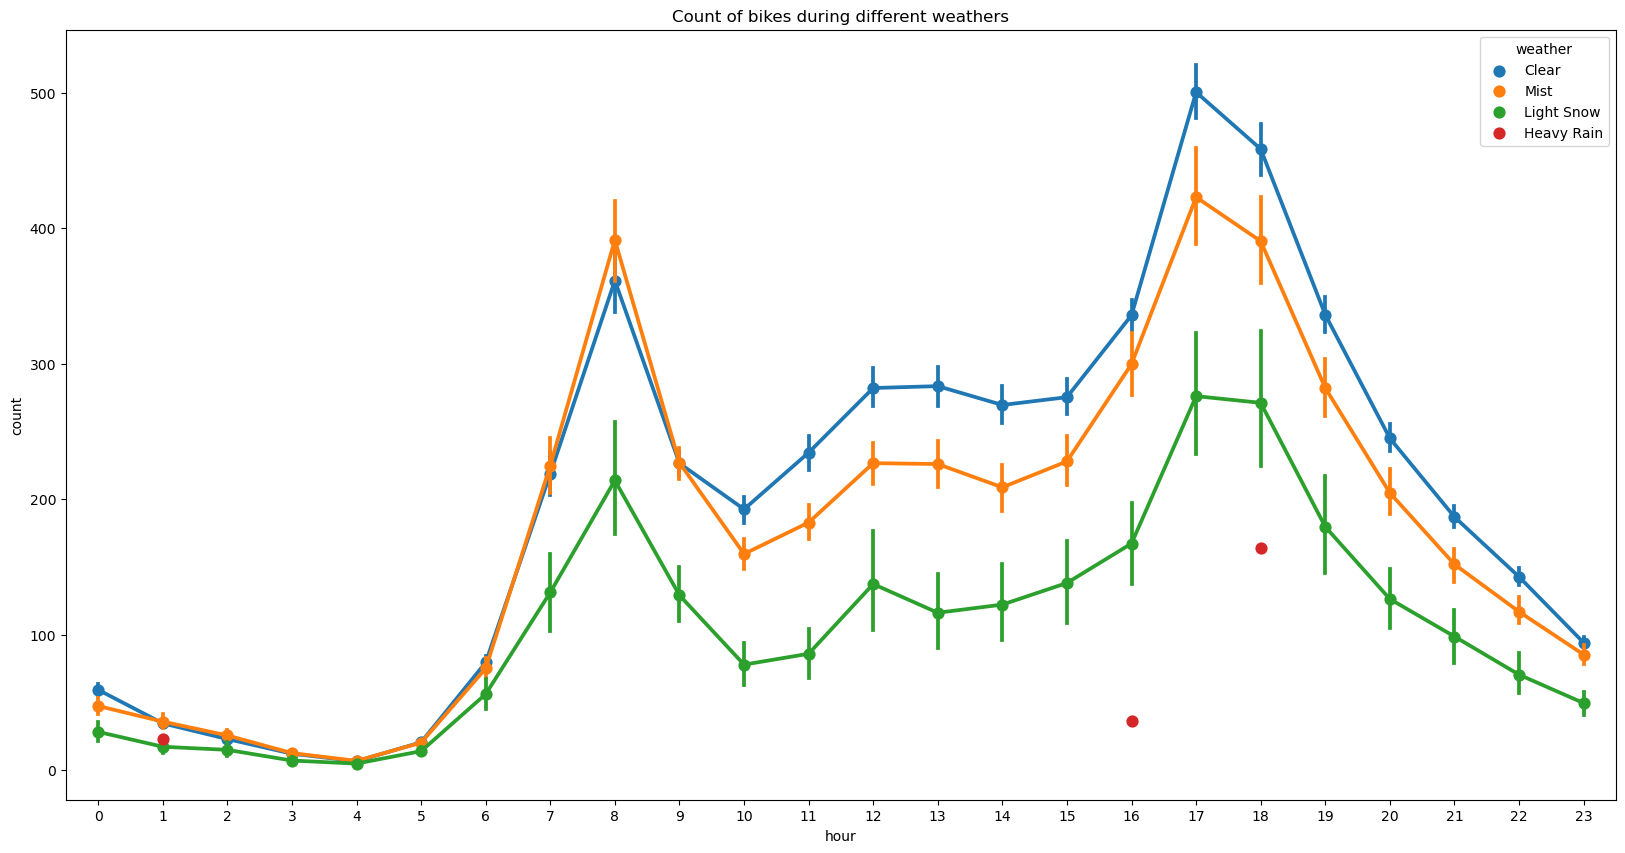

In [31]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hour', y='count', hue='weather', ax=ax)
ax.set(title='Count of bikes during different weathers')

#### Conclusion: 

We can observe a peak or increase in the booking of bike for first 3 weathers at morning hours and evening hours.

Also Weather 4 with the color orange must indicate rain, we can clearly see that no users book the bike.

#### Visualizing categorical variables with the target variable :

#### BarPlot

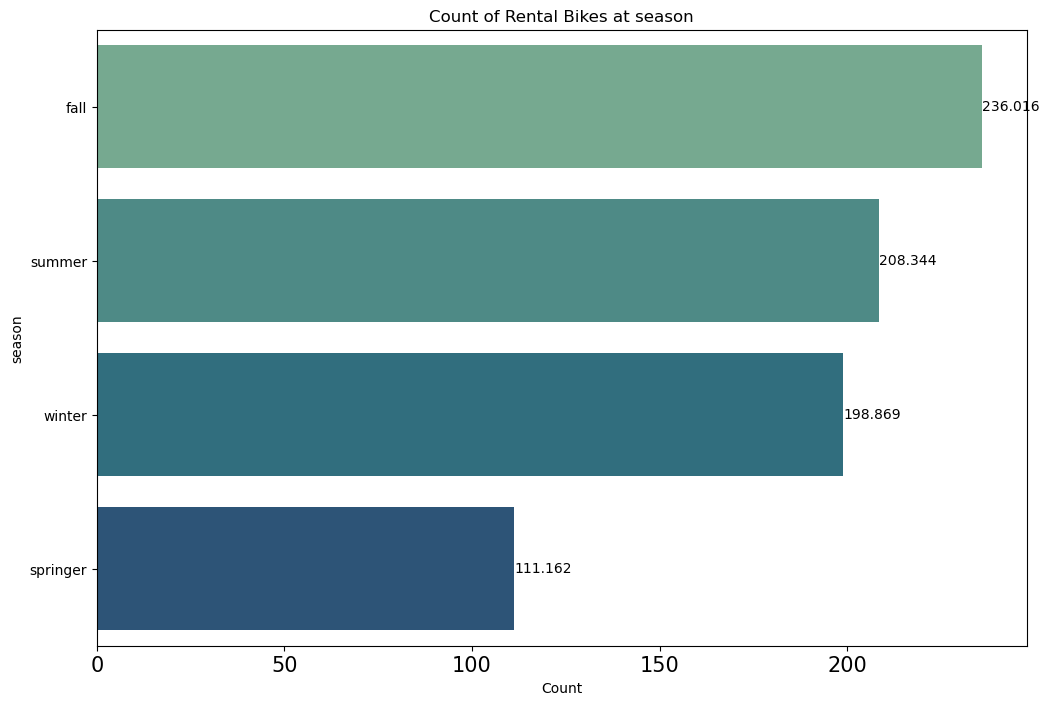

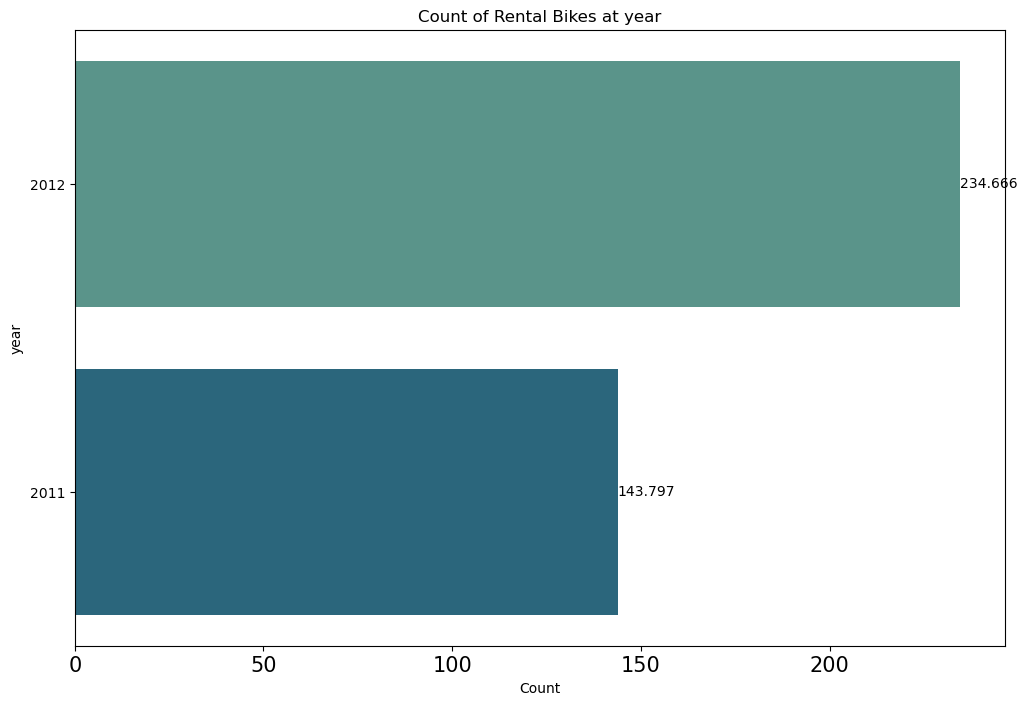

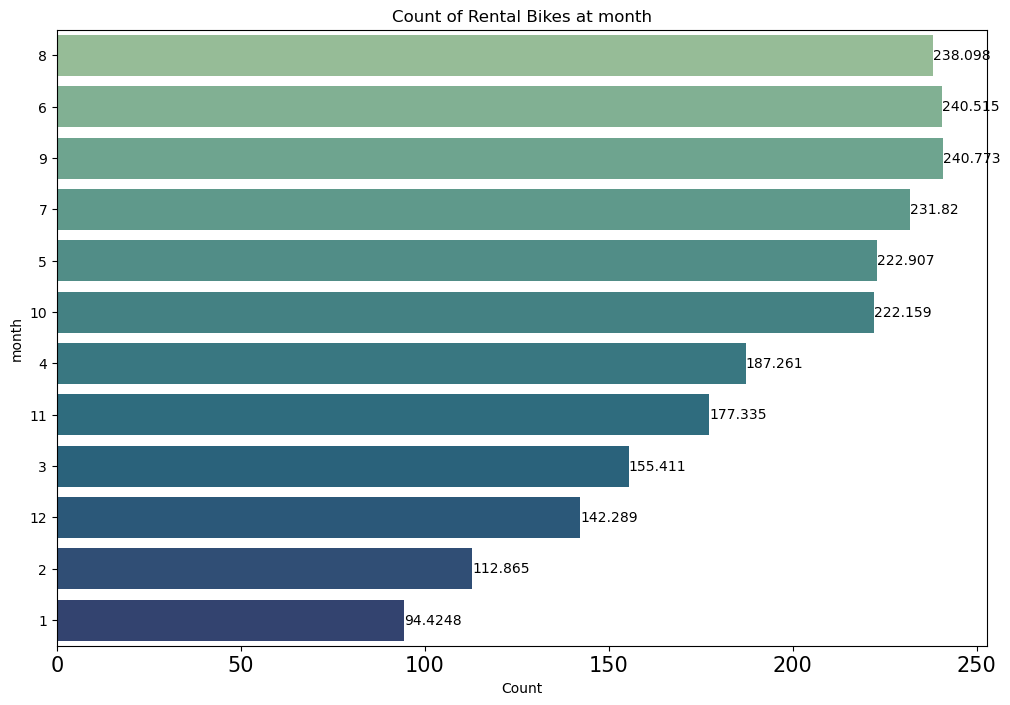

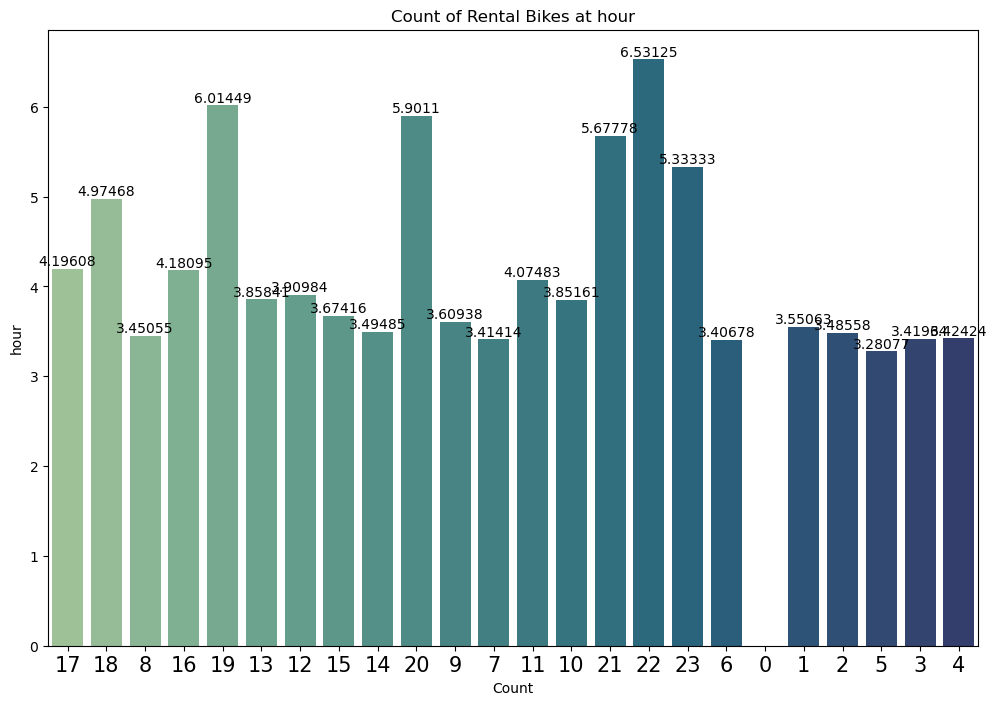

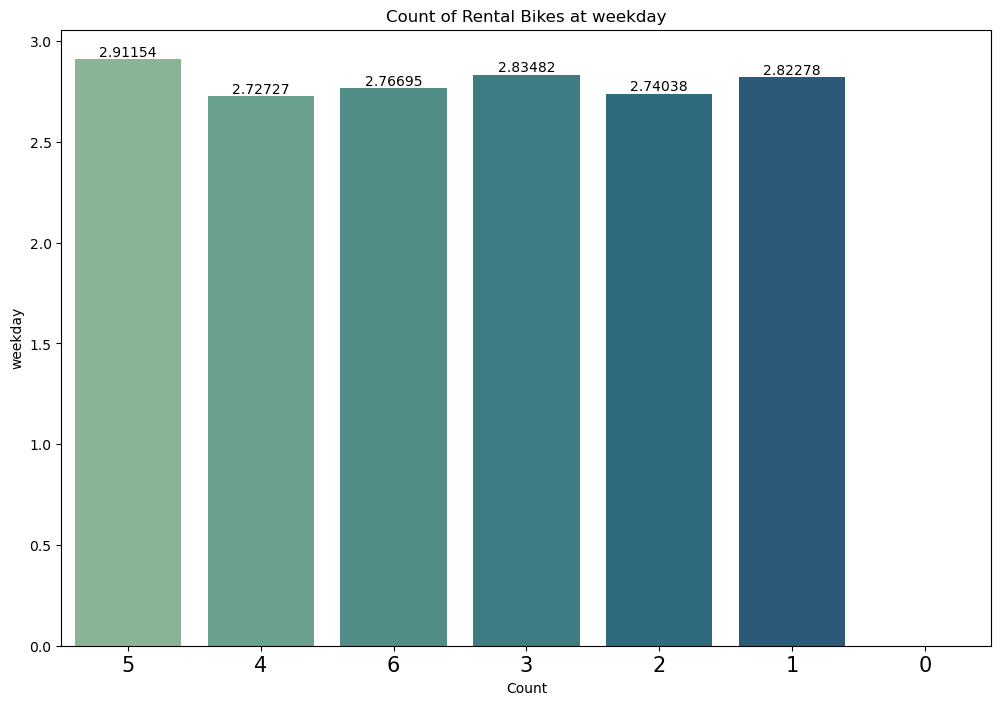

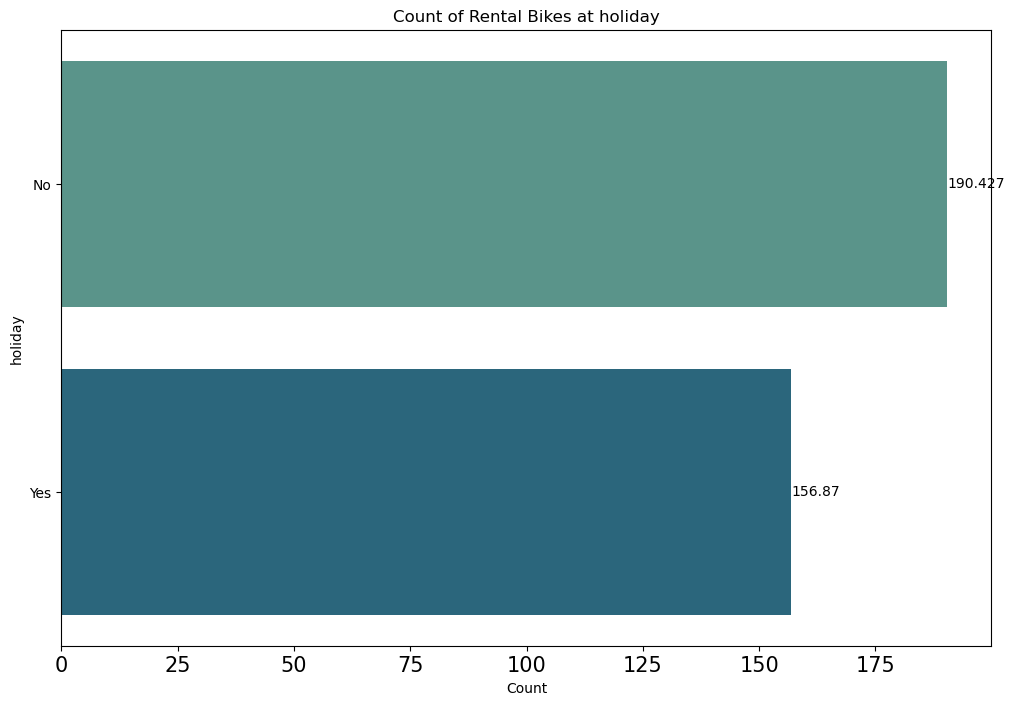

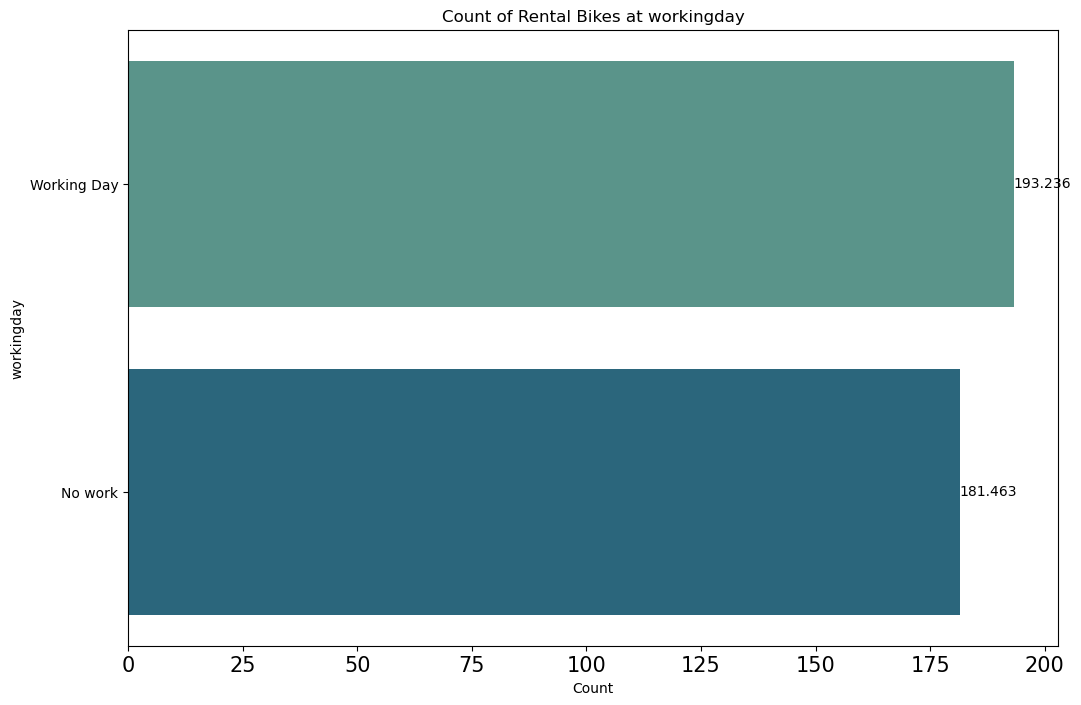

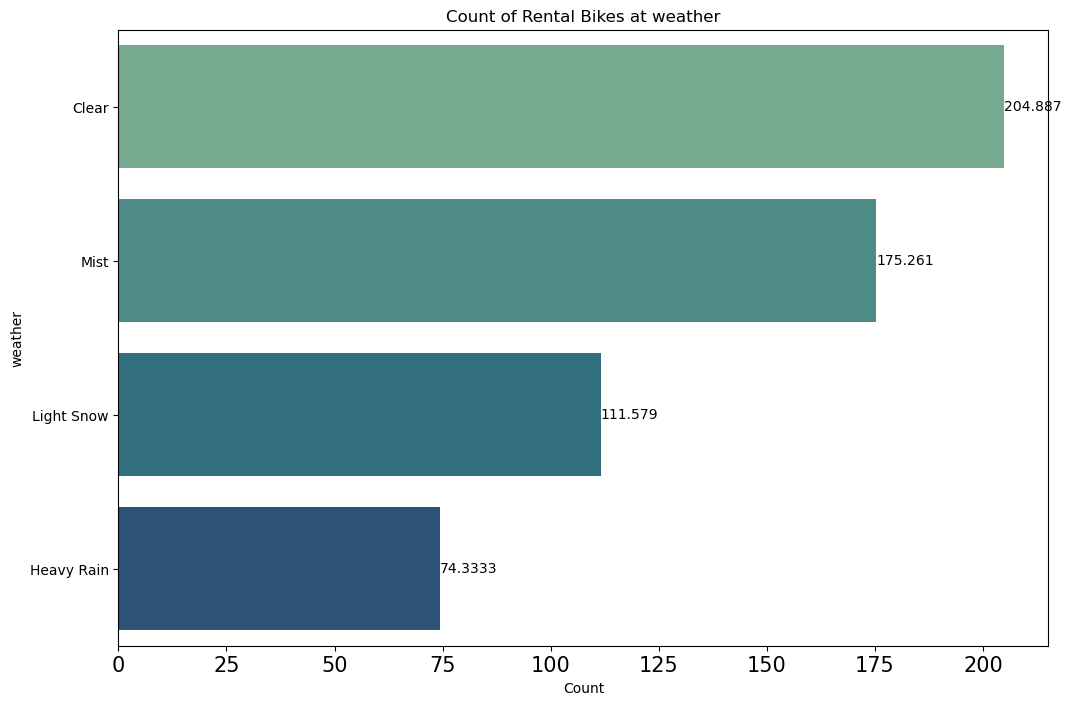

In [32]:
cols = ['season', 'year', 'month','hour','weekday', 'holiday', 'workingday', 'weather']
for col in cols:
    plt.figure(figsize=(12, 8))
    order=df.groupby([col])['count'].sum().sort_values(ascending=False).index
    ax = sns.barplot(y=col, x='count',data=df,palette='crest',ci=None,order=order)
    plt.xticks(fontsize=15)
    for i in ax.containers:
        ax.bar_label(i,)
    plt.title(f'Count of Rental Bikes at {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

#### Conclusion:

Count of rental bikes at different seasons, year, month, holiday, workingday and weather condition has been shown above.

The bike rental count is highest during fall season, follwed by summer, winter and lowest at spring season.

The year 2012 has higher count compared to 2011.

Monthwise September month has highest count and January has the lowest.

The rental count has been higher during working days compared to holidays and at morning and evening hours.

The rental count is higher when the weather is clear. Gradually decreases when there is mist and light snow. Lowest when there is heavy rain.

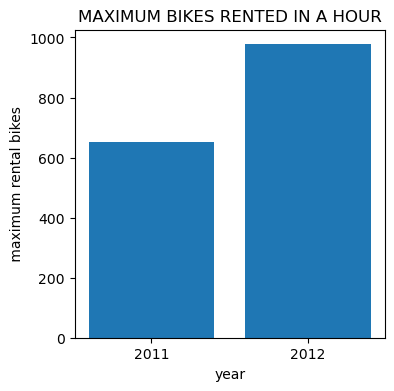

In [33]:
plt.figure(figsize=(4,4))
plt.bar(df_data_encoded["year"],df_data_encoded["count"])
plt.ylabel(' maximum rental bikes ')
plt.xlabel('year')
plt.title("MAXIMUM BIKES RENTED IN A HOUR")
plt.xticks([1,2],['2011', '2012'])
plt.show()

#### Conclusion:

We can see MAX Numbers of bikes rented in a hour is more in 2012 when compared to 2011.

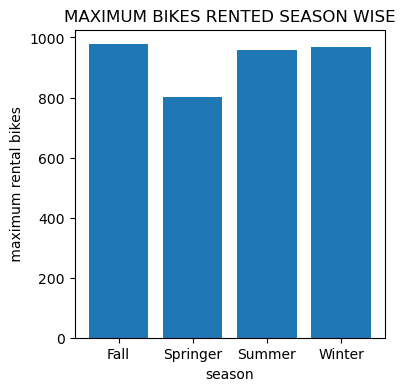

In [34]:
plt.figure(figsize=(4,4))
plt.bar(df_data_encoded["season"],df_data_encoded["count"])
plt.ylabel(' maximum rental bikes ')
plt.xlabel('season')
plt.title("MAXIMUM BIKES RENTED SEASON WISE")
plt.xticks([1,2,3,4],['Fall', 'Springer', 'Summer', 'Winter'])
plt.show()

#### Conclusion:

From Above plot we can observe that More Bikes were rented in Fall season compares to other seasons

In [35]:
z=df_data_encoded.groupby(["month"])["count"].agg(["sum"])
z.sort_values(by="sum",ascending=False)

,sum
month,
8,351194
6,346342
9,345991
7,344948
5,331686
10,322352
4,269094
11,254831
3,228920


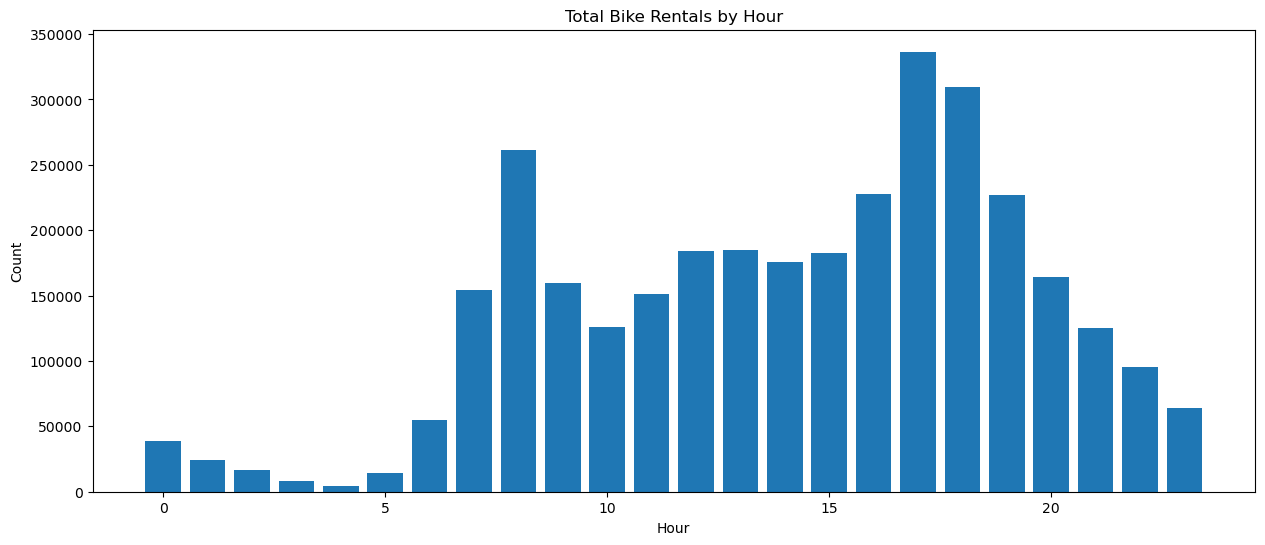

In [36]:
x=df_data_encoded.groupby(["hour"])["count"].agg(["sum"])
# create a bar plot
plt.figure(figsize=(15,6))
plt.bar(x.index, x["sum"])
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Total Bike Rentals by Hour")
plt.show()

#### Conclusion :
We can clearly see that Demand of bikes at 5 pm(17) was maximum so peak time was 5 pm in evening

#### Pointplot

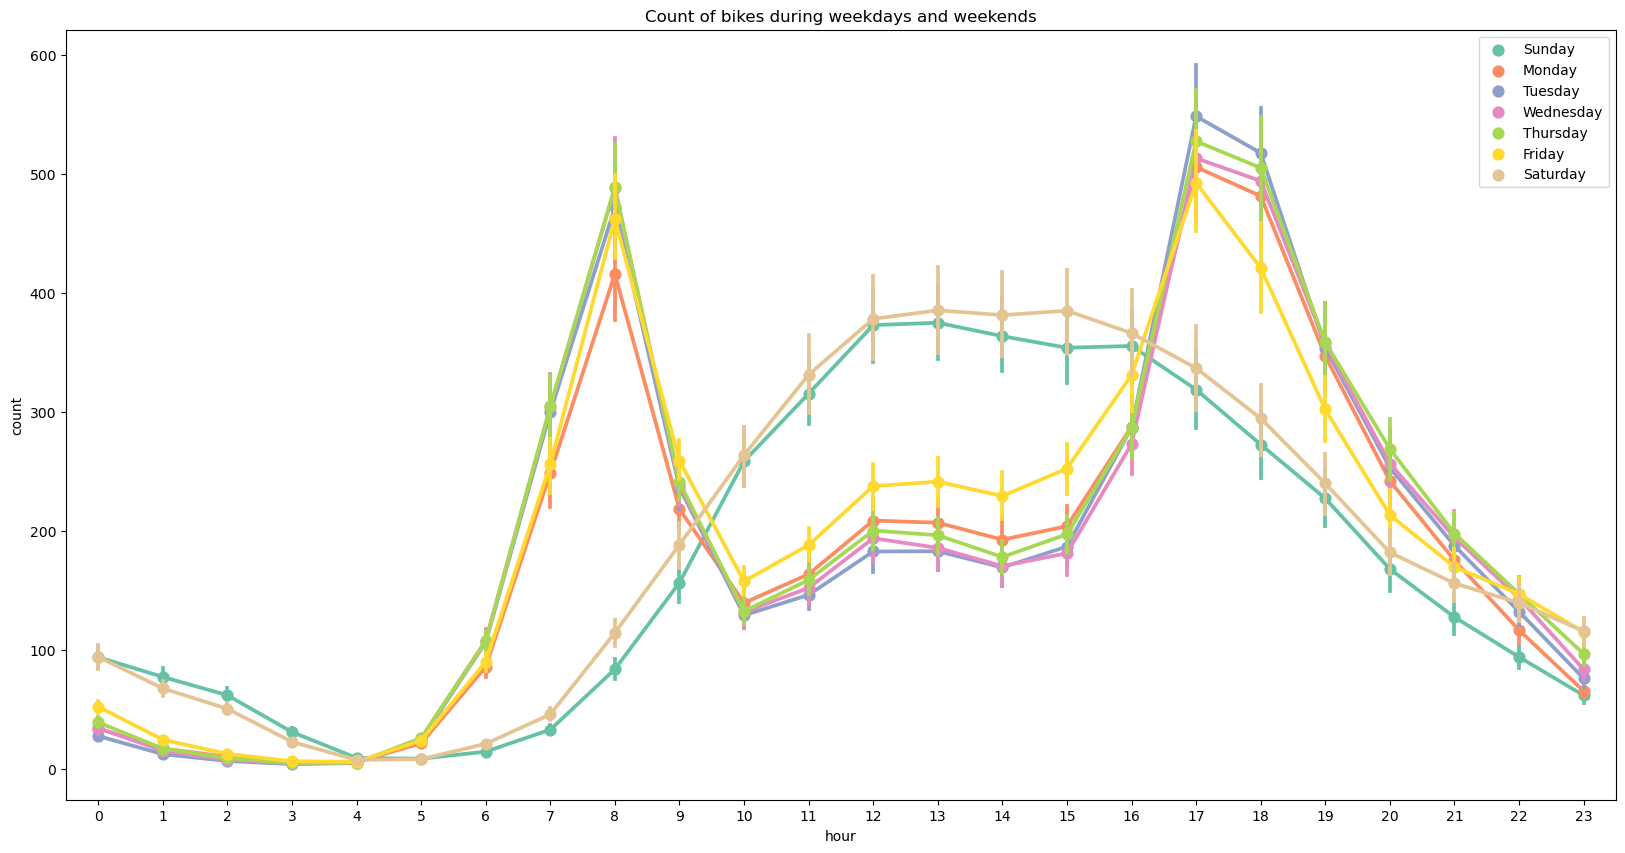

In [37]:

fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df_data_encoded, x='hour', y='count', hue='weekday', ax=ax, palette='Set2')
ax.set(title='Count of bikes during weekdays and weekends')


handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

#### Conclusion:
1. Peak time is at around 7am and 5pm on Weekdays
2. Peak time for weekends is at afternoon between 12-01Pm

#### Barplot

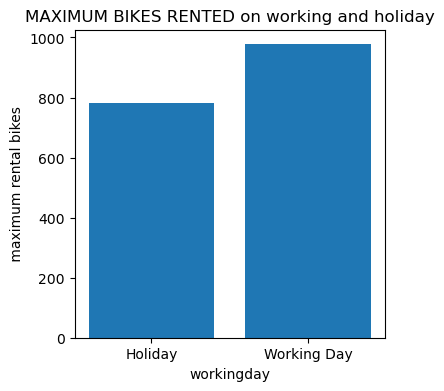

In [38]:
plt.figure(figsize=(4,4))
plt.bar(df_data_encoded["workingday"],df_data_encoded["count"])
plt.ylabel(' maximum rental bikes ')
plt.xlabel('workingday')
plt.title("MAXIMUM BIKES RENTED on working and holiday")
plt.xticks([1,2],['Holiday', 'Working Day'])
plt.show()

#### Conclusion:

 We can see that on Working Days there is maximum bikes are rented

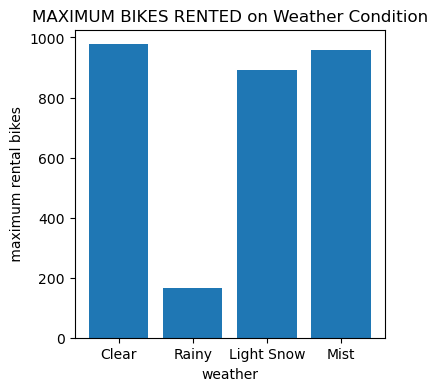

In [39]:
plt.figure(figsize=(4,4))
plt.bar(df_data_encoded["weather"],df_data_encoded["count"])
plt.ylabel(' maximum rental bikes ')
plt.xlabel('weather')
plt.title("MAXIMUM BIKES RENTED on Weather Condition")
plt.xticks([1,2,3,4],['Clear', 'Rainy', 'Light Snow', 'Mist'])
plt.show()

#### Conclusion:

We can observe in the above plot that Bike Rentals are very high on Clear Weather conditions and very low on Rainy Conditions.

#### Pie chart

[619473.0, 2670313.0]


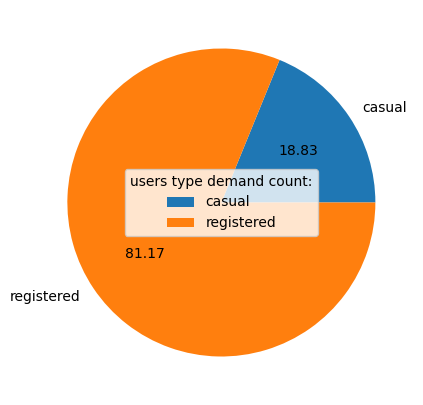

In [40]:
plt.figure(figsize=(5,5))
u_t=df_data_encoded["casual"].sum()
r_t=df_data_encoded["registered"].sum()
l=[u_t,r_t]
print(l)
mylabels = ["casual", "registered"]
plt.pie(l,labels = mylabels,autopct ='%.2f')
plt.legend(title = "users type demand count:")
plt.show()

#### Conclusion :

Clearly the demand of registered users were high and the value is 81.17% .

<Axes: >

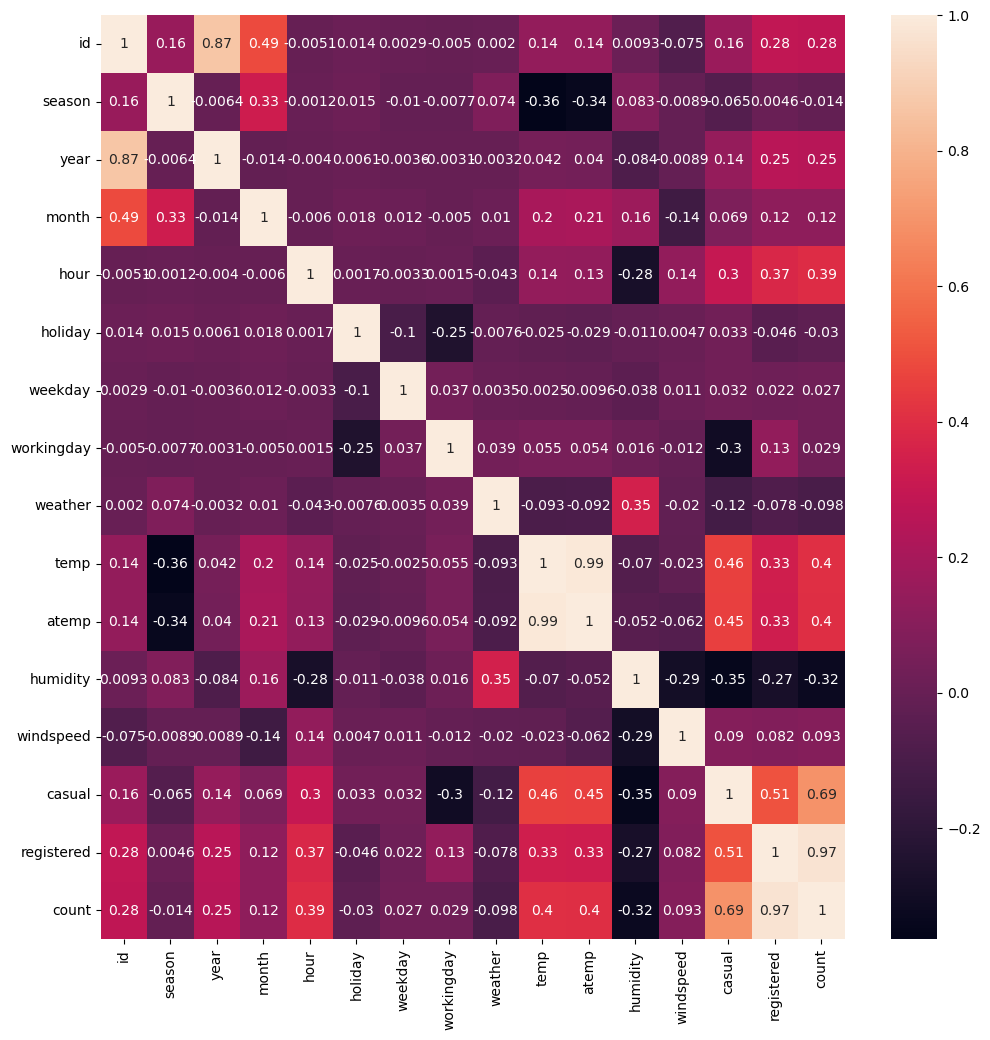

In [41]:
plt.figure(figsize=(12,12))
a = df_data_encoded.corr()
sns.heatmap(a,annot = True)

#### Conclusion:

below Features that are highly Correlated to Total_count:

- Registered Users are very Strongly Corelated with total_count - 0.97
- casual also Positively strong corelared with total_count - 0.69
- hour is positively corelated with total_count - 0.39
- temp is positively corelated with total_count - 0.4
- Humidity is Negatively corelated with total_count - -0.32


## Outlier Analysis

In [42]:
df_data_encoded

,id,datetime,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,2,1,1,0,1,6,1,1,0.24,0.2879,0.81,0.0000,3.0,13.0,16
1,2,2011-01-01,2,1,1,1,1,6,1,1,0.22,0.2727,0.80,0.0000,8.0,32.0,40
3,4,2011-01-01,2,1,1,3,1,6,1,1,0.24,0.2879,0.75,0.0000,3.0,10.0,13
4,5,2011-01-01,2,1,1,4,1,6,1,1,0.24,0.2879,0.75,0.0000,0.0,1.0,1
5,6,2011-01-01,2,1,1,5,1,6,1,4,0.24,0.2576,0.75,0.0896,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17370,17371,2012-12-31,2,2,12,15,1,1,2,4,0.28,0.2879,0.45,0.1343,69.0,246.0,315
17373,17374,2012-12-31,2,2,12,18,1,1,2,4,0.26,0.2727,0.48,0.1343,10.0,112.0,122
17374,17375,2012-12-31,2,2,12,19,1,1,2,4,0.26,0.2576,0.60,0.1642,11.0,108.0,119
17375,17376,2012-12-31,2,2,12,20,1,1,2,4,0.26,0.2576,0.60,0.1642,8.0,81.0,89


In [43]:
df_data_encoded.dtypes

id                     int64
datetime      datetime64[ns]
season                 int32
year                   int32
month                  int64
hour                   int64
holiday                int32
weekday                int64
workingday             int32
weather                int32
temp                 float64
atemp                float64
humidity             float64
windspeed            float64
casual               float64
registered           float64
count                  int64
dtype: object

#### BOX Plot

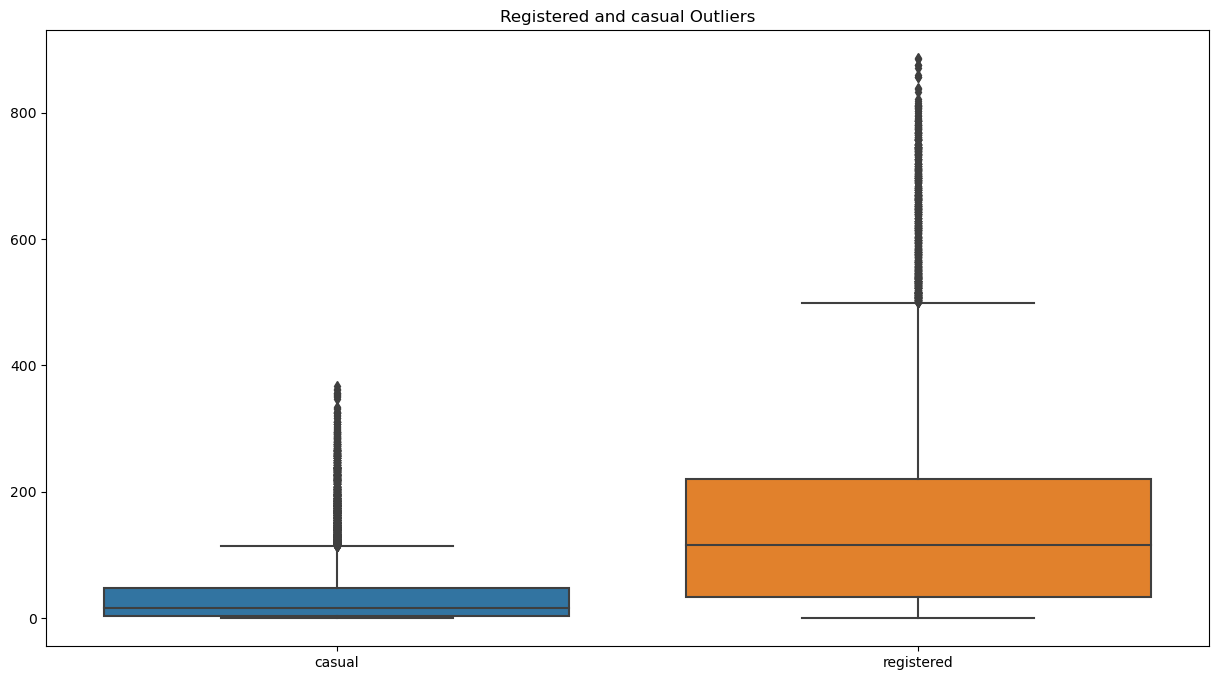

In [44]:
fig,ax=plt.subplots(figsize=(15,8))
#Box plot for registered and unregistered users
sns.boxplot(data=df_data_encoded[['casual','registered']])
ax.set_title('Registered and casual Outliers')
plt.show()


#### Conclusion:
   
 Observed that there are few outliers  Registered and casual columns, we have to handle these columns and have to remove the outliers

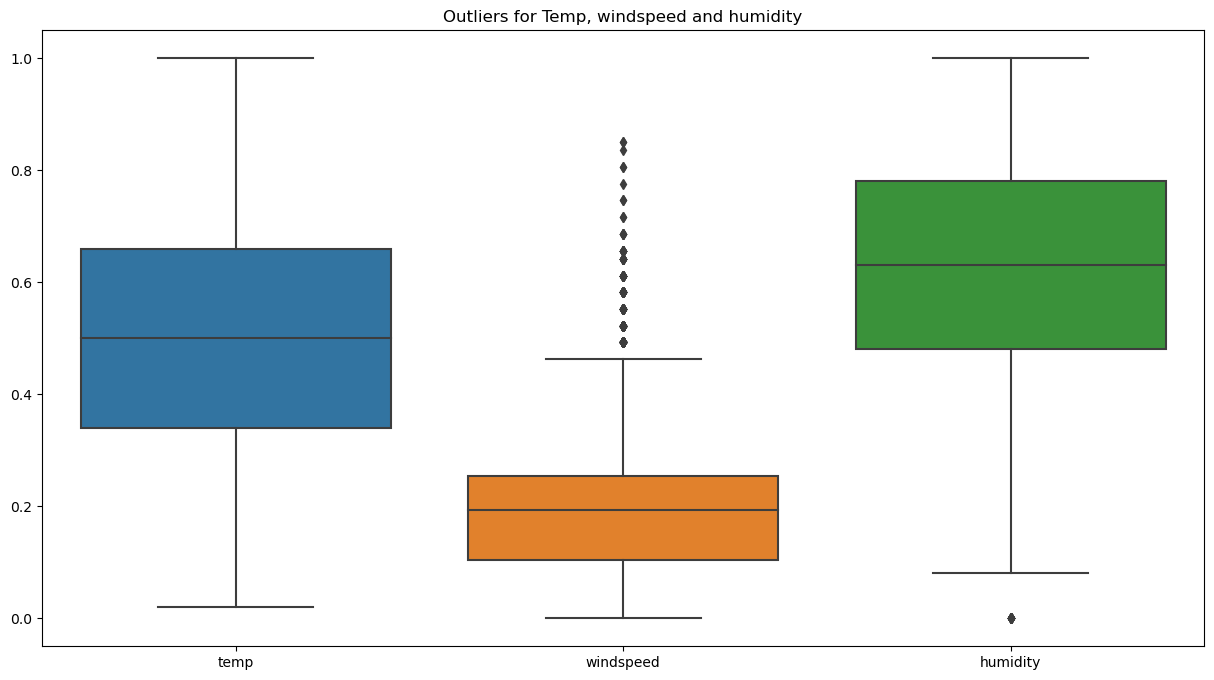

In [45]:
fig,ax=plt.subplots(figsize=(15,8))
#Box plot for Temp, Windspeed and humidity
sns.boxplot(data=df_data_encoded[['temp','windspeed', 'humidity']])
ax.set_title('Outliers for Temp, windspeed and humidity')
plt.show()


#### Conclusion:

- Observed that there are few outliers in  windspeed.
- No outliers were found for temp.
- Very few outliers were found for Humidity, which we can ignore.

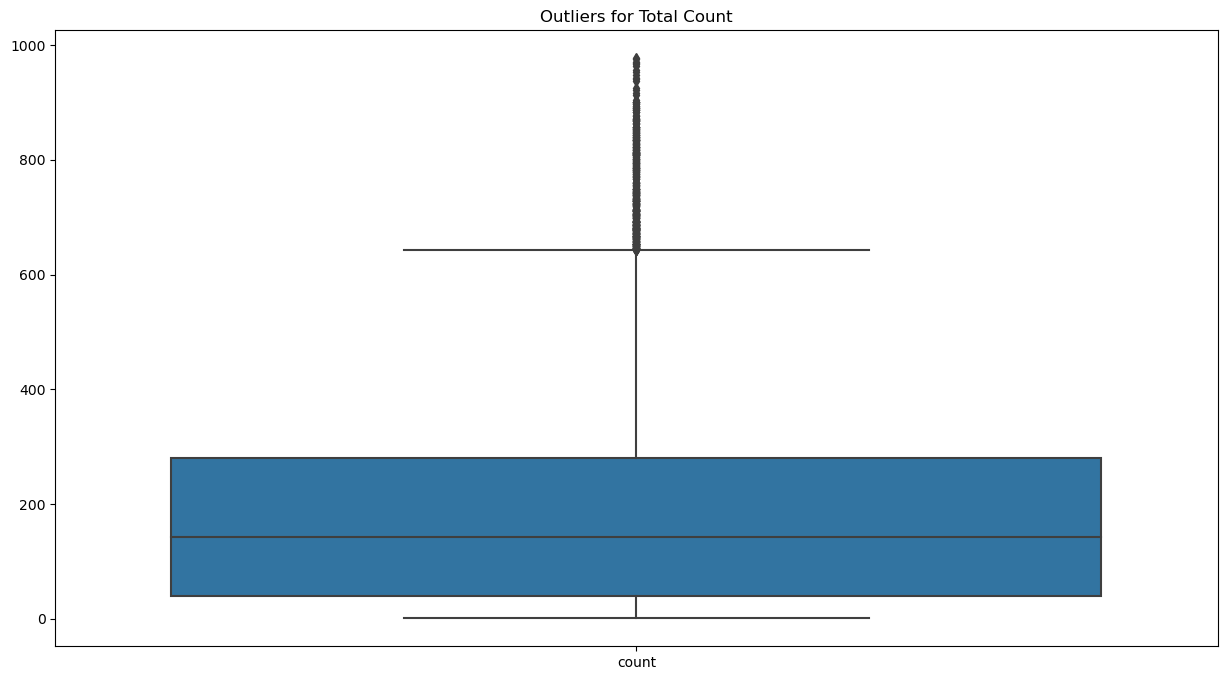

In [46]:
fig,ax=plt.subplots(figsize=(15,8))
#Box plot for Total Count
sns.boxplot(data=df_data_encoded[['count']])
ax.set_title('Outliers for Total Count')
plt.show()


#### Conclusion

Observed that there are few outliers for count we have to handle these column.

In [47]:
# Names of that Columns which are having Outliers:

col_outliers = ['count', 'humidity', 'windspeed', 'registered', 'casual']

In [48]:
# function for plotting Box plot for columns having outliers

def boxplot_outliers(df):
  fig,ax=plt.subplots(figsize=(20,10))
  sns.boxplot(data=df[['count','windspeed', 'humidity', 'registered', 'casual']])
  ax.set_title('Outliers detection')
  plt.show()

#### Approches to handle outliers:

- Winsorize the data
- Transform the data
- Capping
- IQR  


 ##### Winsorize:
Winsorization is the process of replacing the extreme values of statistical data in order to limit the effect of the outliers on the calculations or the results obtained by using that data. The mean value calculated after such replacement of the extreme values is called winsorized mean.

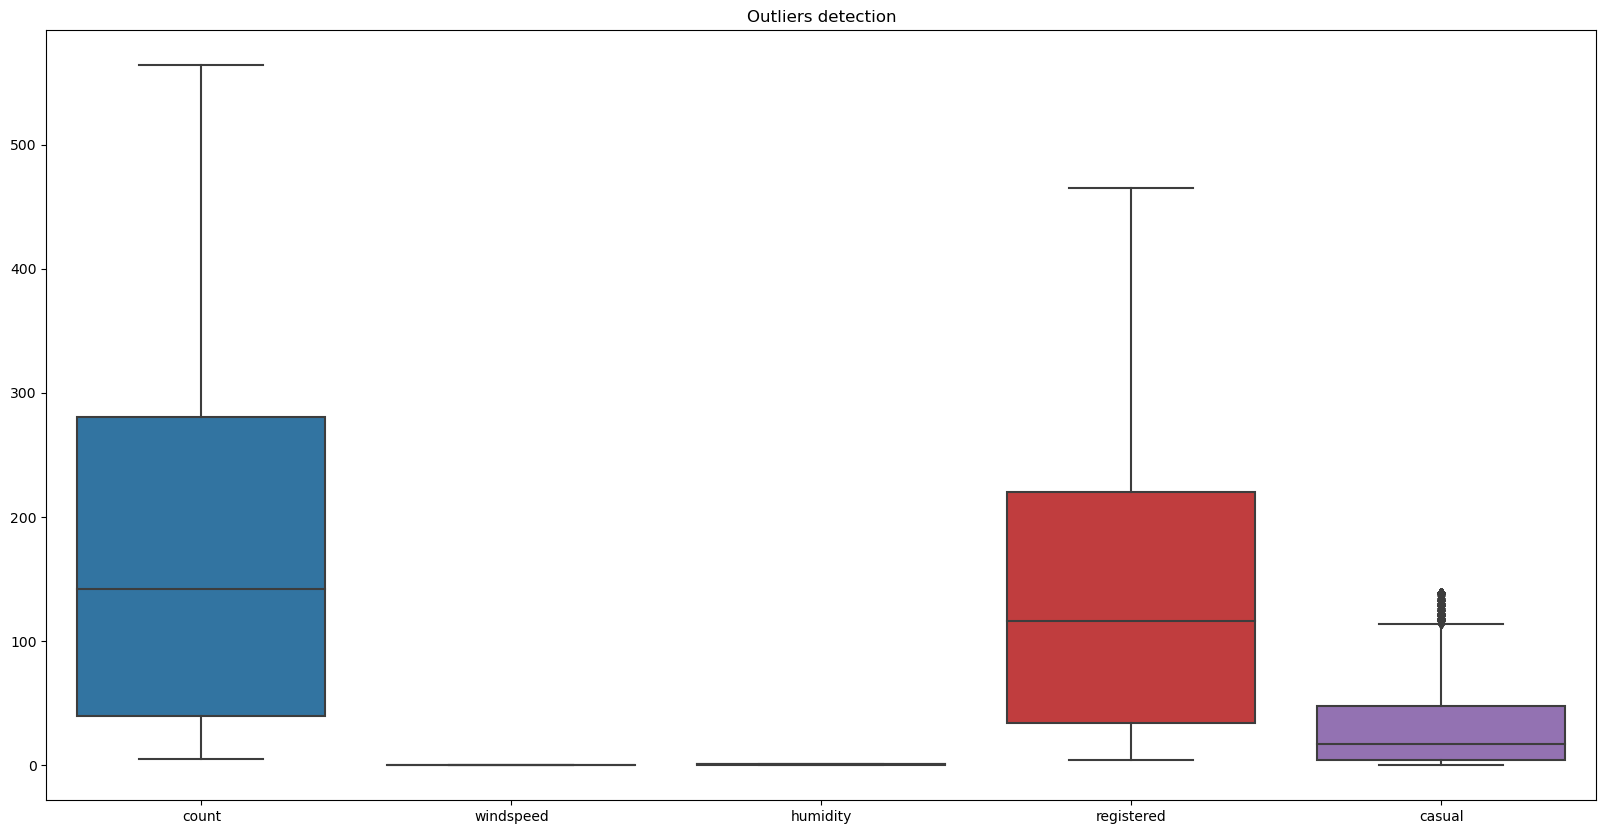

In [49]:

from scipy.stats.mstats import winsorize


#copying the data
df_winsorize = df_data_encoded.copy()

for col in col_outliers:
    df_winsorize[col] = winsorize(df_winsorize[col], limits=[0.05, 0.05]) #standard limit value 5%

boxplot_outliers(df_winsorize)

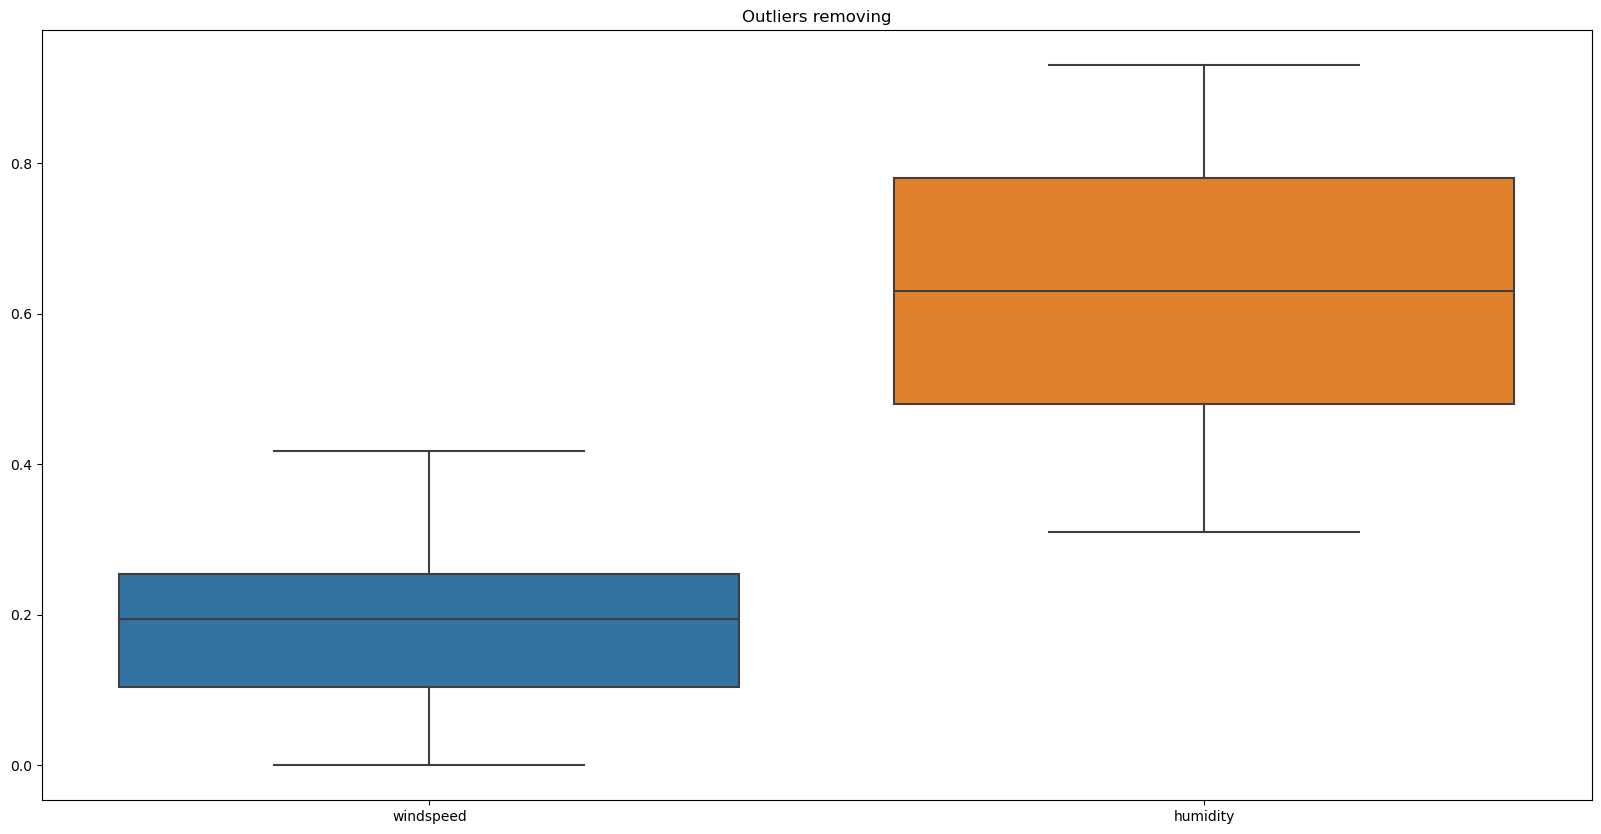

In [50]:
fig,ax=plt.subplots(figsize=(20,10))
sns.boxplot(data=df_winsorize[['windspeed', 'humidity']])
ax.set_title('Outliers removing')
plt.show()

#### Conclusion:
The lower and upper limits are set to Q1 - 1.5IQR and Q3 + 1.5IQR, respectively, where Q1 and Q3 are the first and third quartiles of the data. 

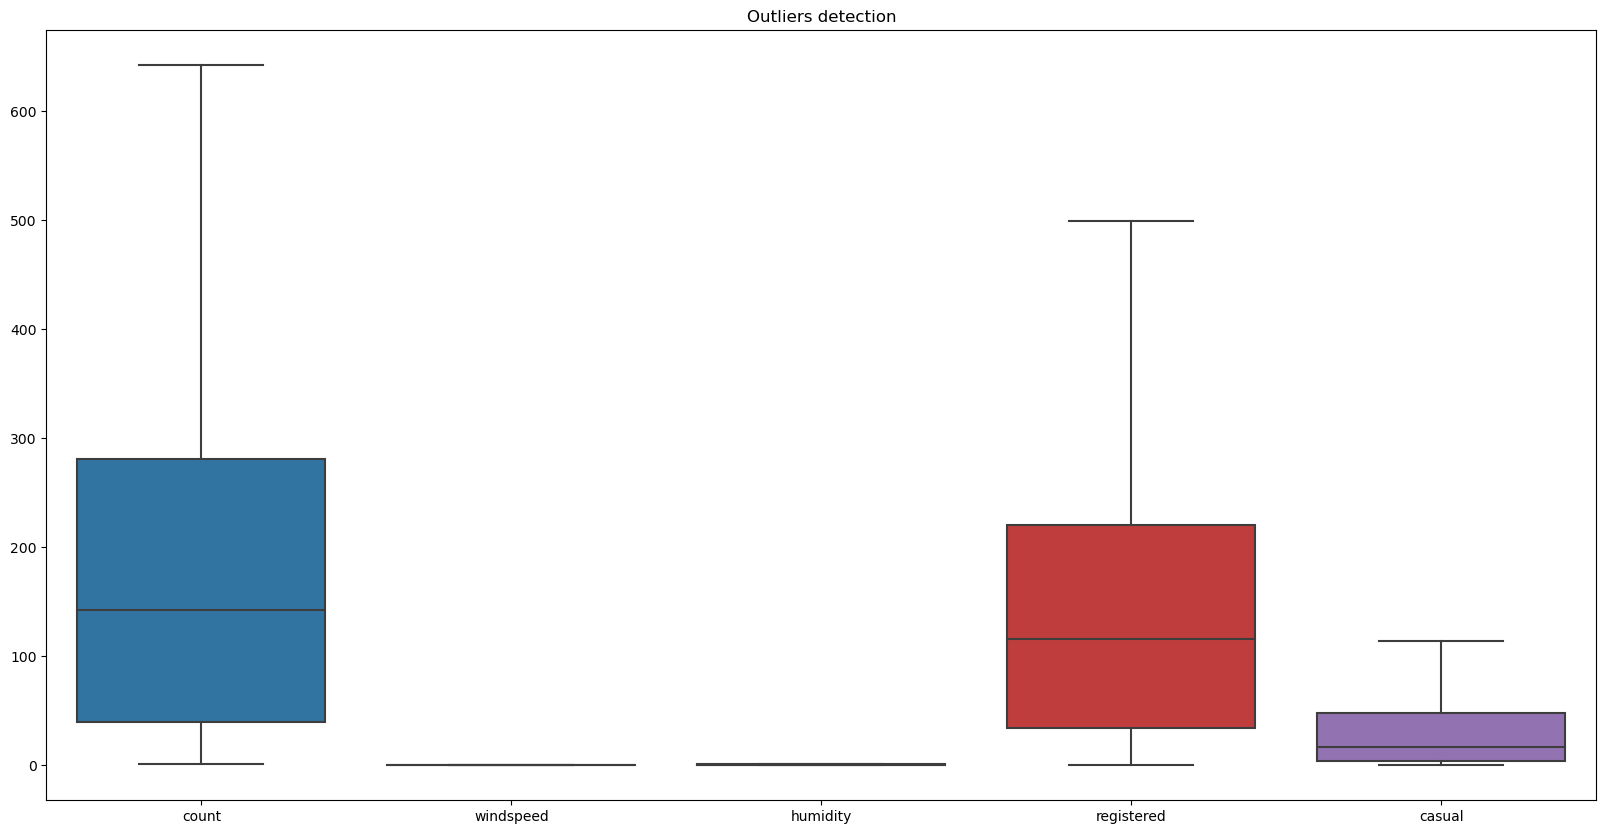

In [51]:
# winsorize method with custom limits
from scipy.stats.mstats import winsorize


#copying the data
df_winsorize_cus = df_data_encoded.copy()

for col in col_outliers:
    q1 = df_winsorize_cus[col].quantile(0.25)
    q3 = df_winsorize_cus[col].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    df_winsorize_cus[col] = winsorize(df_winsorize_cus[col], limits=[(df_winsorize_cus[col] < lower_limit).sum() / len(df_winsorize_cus), (df_winsorize_cus[col] > upper_limit).sum() / len(df_winsorize_cus)])


boxplot_outliers(df_winsorize_cus)

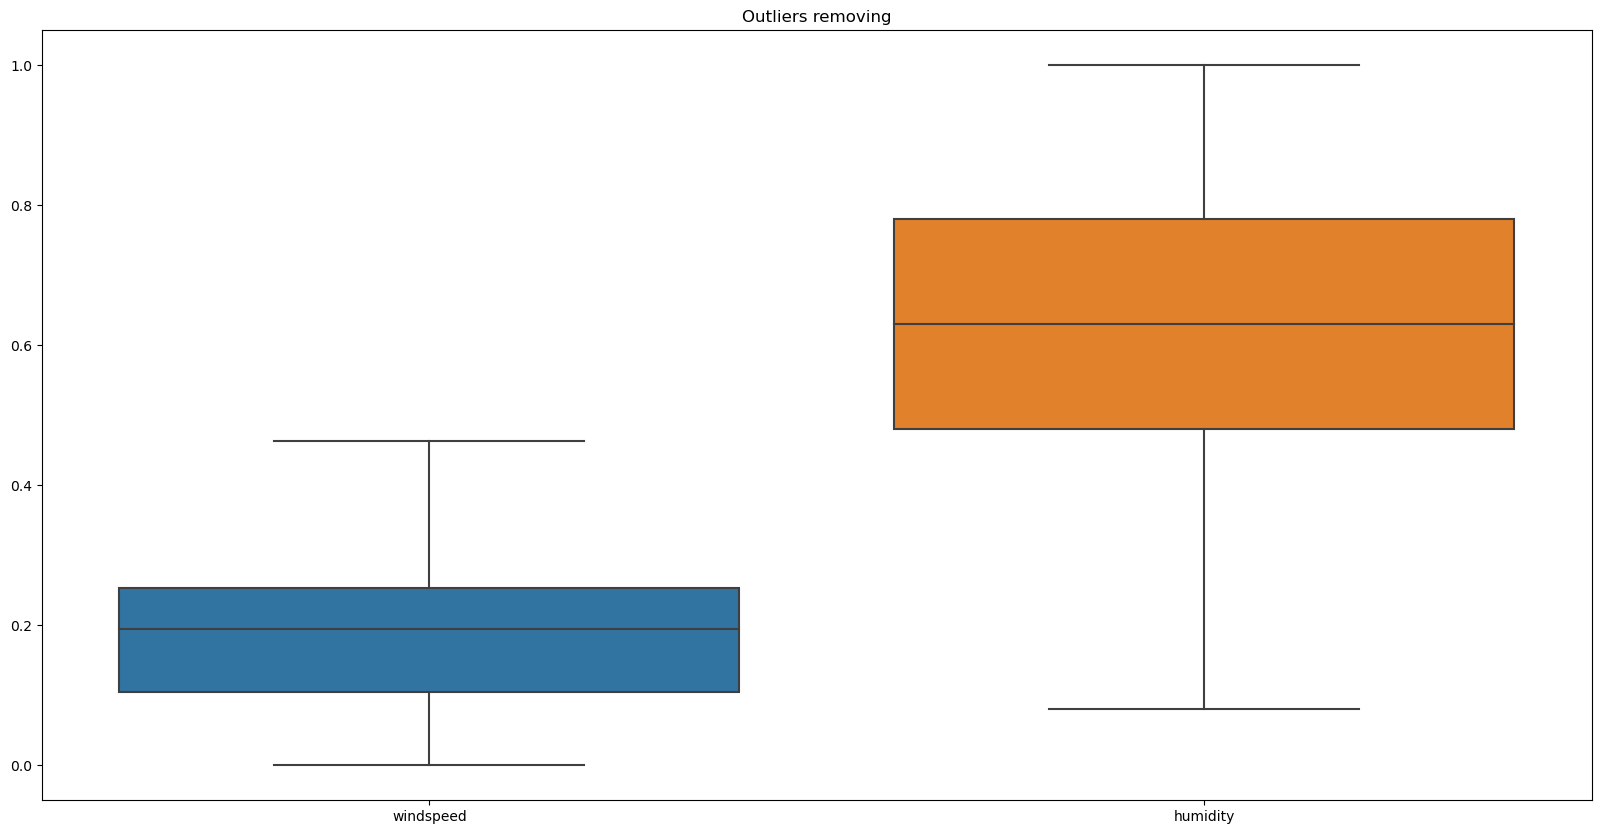

In [52]:
fig,ax=plt.subplots(figsize=(20,10))
sns.boxplot(data=df_winsorize_cus[['windspeed', 'humidity']])
ax.set_title('Outliers removing')
plt.show()

##### Data Transformation

Transformation of the skewed variables may also help correct the distribution of the variables. These could be logarithmic, square root, or square transformations.

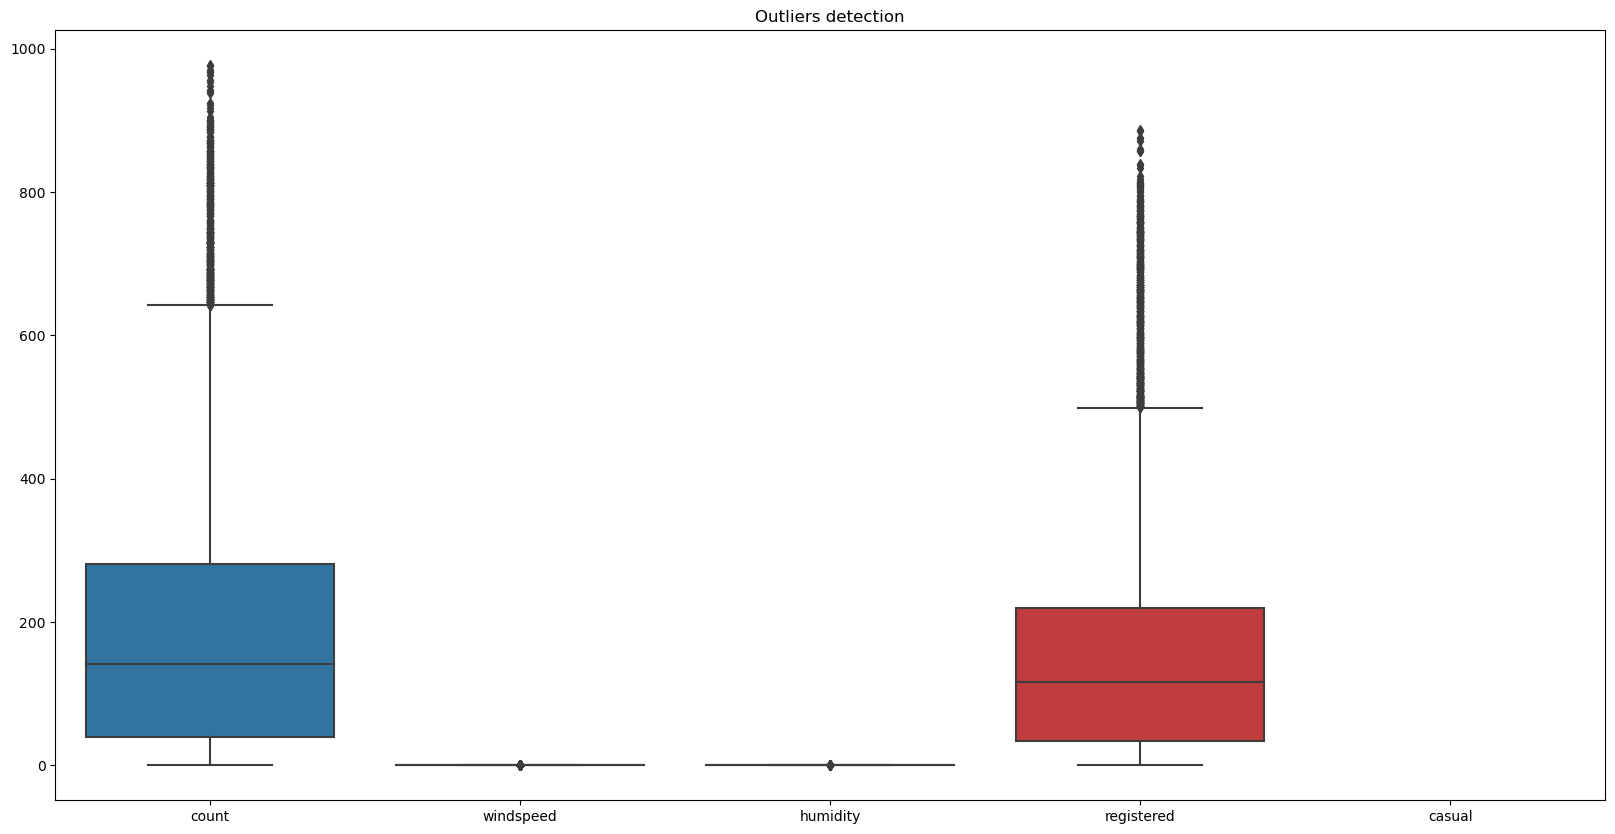

In [53]:
# let us perform SQRT and LOG

df_log = df_data_encoded.copy()
df_sqrt = df_data_encoded.copy()

for cols in col_outliers:
  df_log[col] = np.log(df_log[col])

boxplot_outliers(df_log)

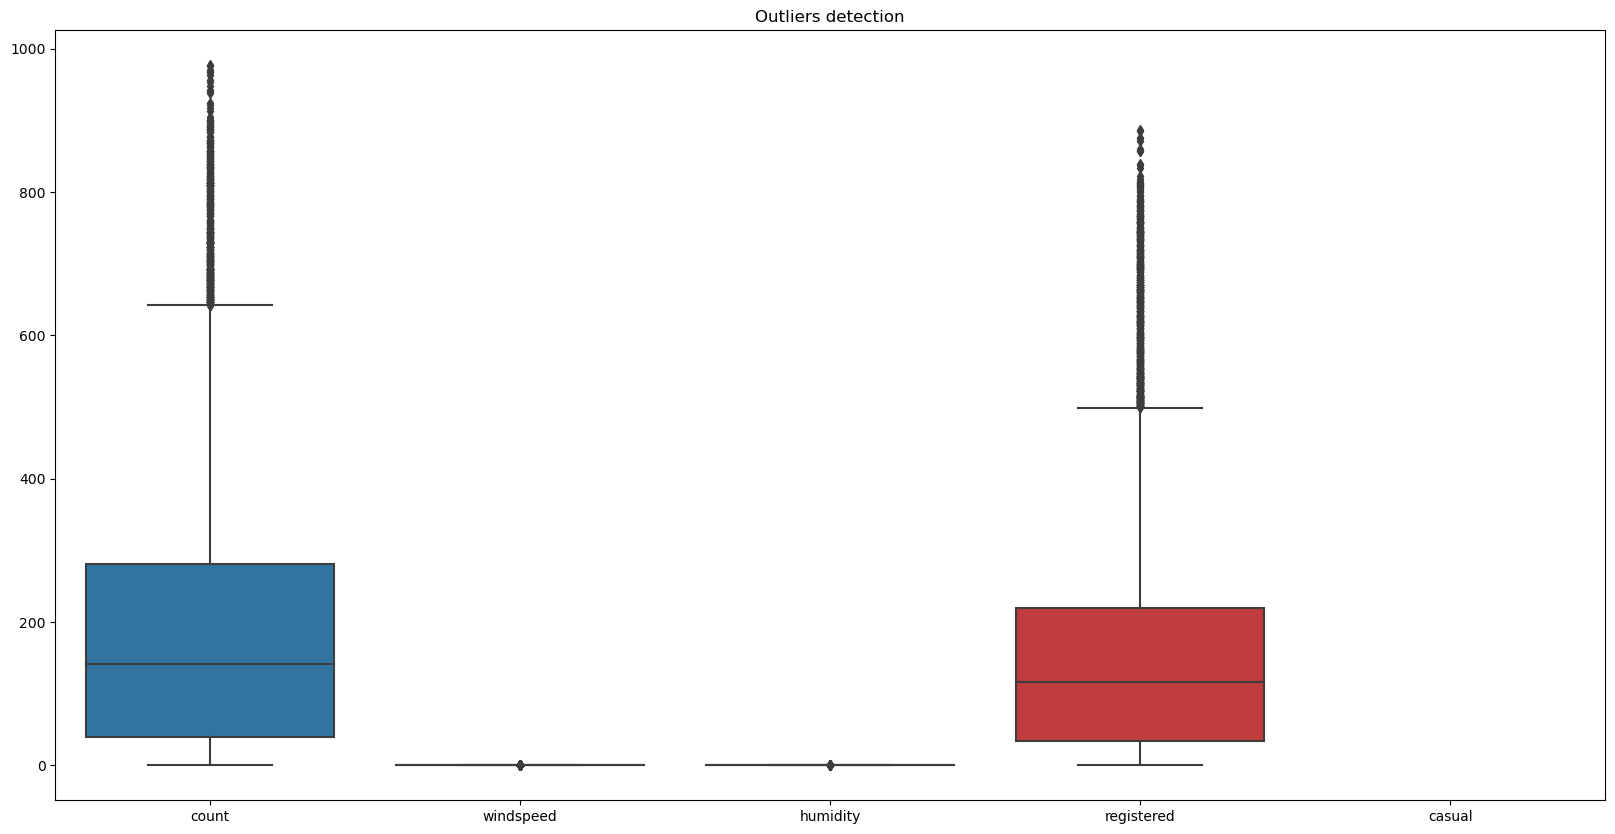

In [54]:
for cols in col_outliers:
  df_sqrt[col] = np.sqrt(df_log[col])

boxplot_outliers(df_sqrt)

##### Capping

In this method, we first initialize a dataframe/series. Then, we set the values of a lower and higher percentile. We use quantile() to return values at the given quantile within the specified range. Then, we cap the values in series below and above the threshold according to the percentile values.

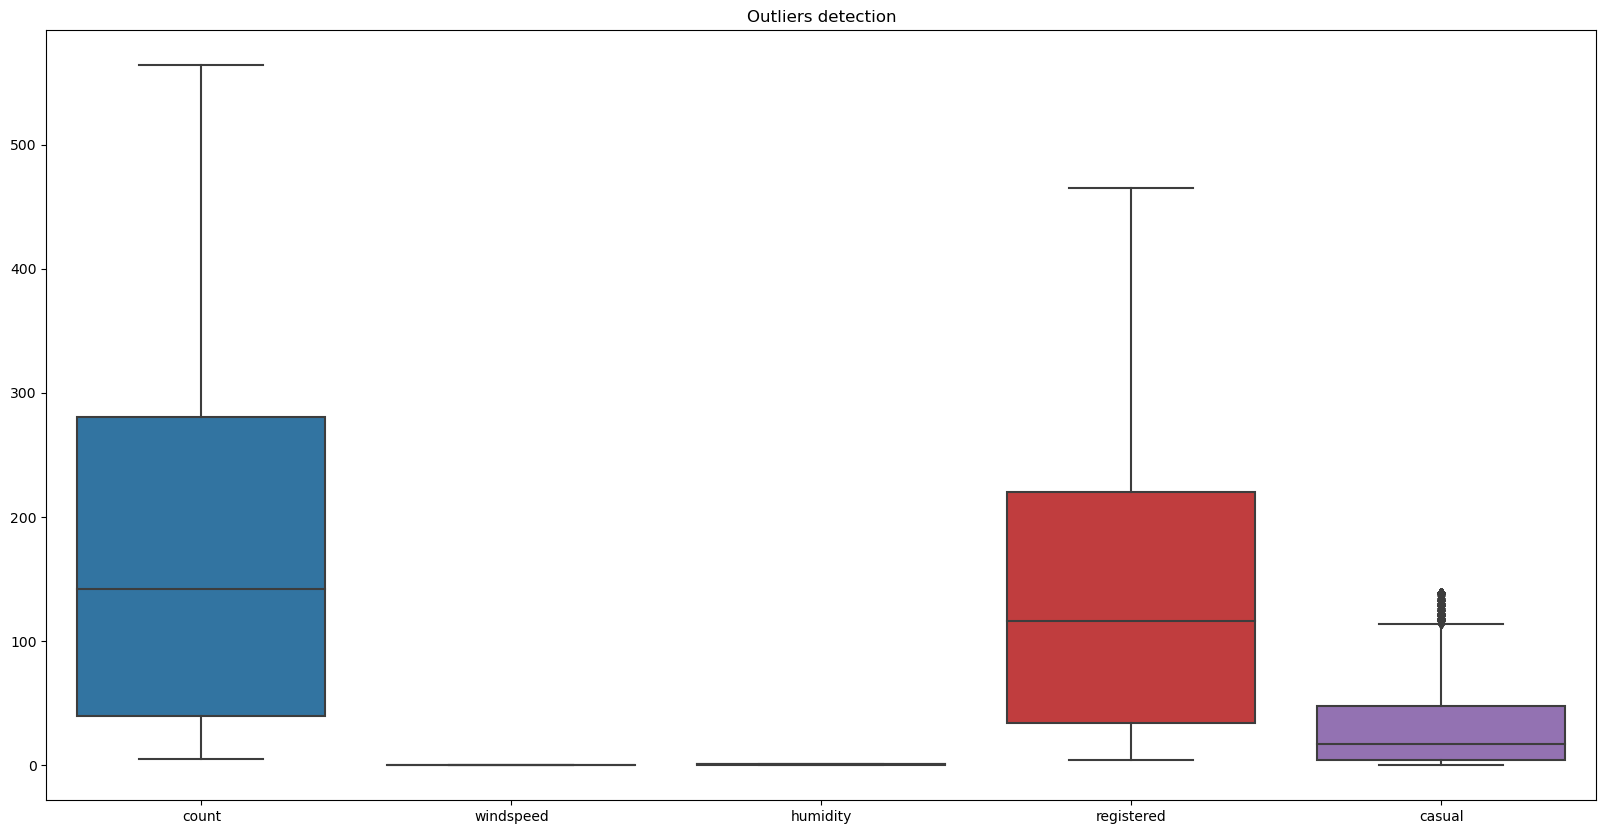

In [55]:
#copying data
df_capping = df_data_encoded.copy()


for col in col_outliers:
    c = 0.05 
    q1 = df_capping[col].quantile(c)
    q2 = df_capping[col].quantile(1-c)
    df_capping[col] = np.where(df_capping[col] < q1, q1, df_capping[col])
    df_capping[col] = np.where(df_capping[col] > q2, q2, df_capping[col])
boxplot_outliers(df_capping)

for better understanding Let us change capping value to 0.1 and check for outliers

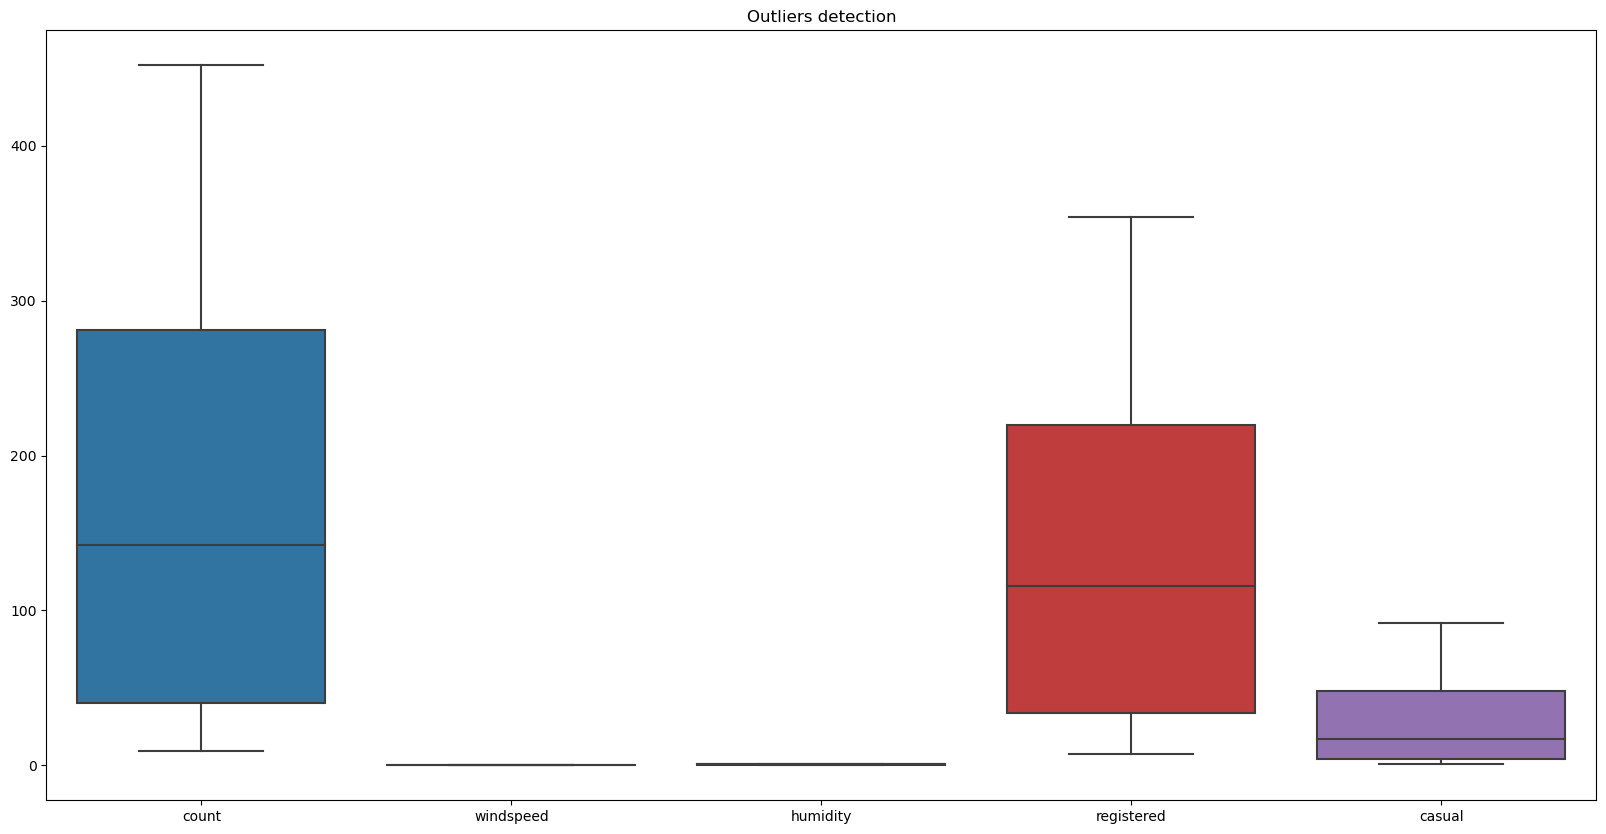

In [56]:
#copying data
df_capping_1 = df_data_encoded.copy()


for col in col_outliers:
    c = 0.1
    q1 = df_capping_1[col].quantile(c)
    q2 = df_capping_1[col].quantile(1-c)
    df_capping_1[col] = np.where(df_capping_1[col] < q1, q1, df_capping_1[col])
    df_capping_1[col] = np.where(df_capping_1[col] > q2, q2, df_capping_1[col])
boxplot_outliers(df_capping_1)

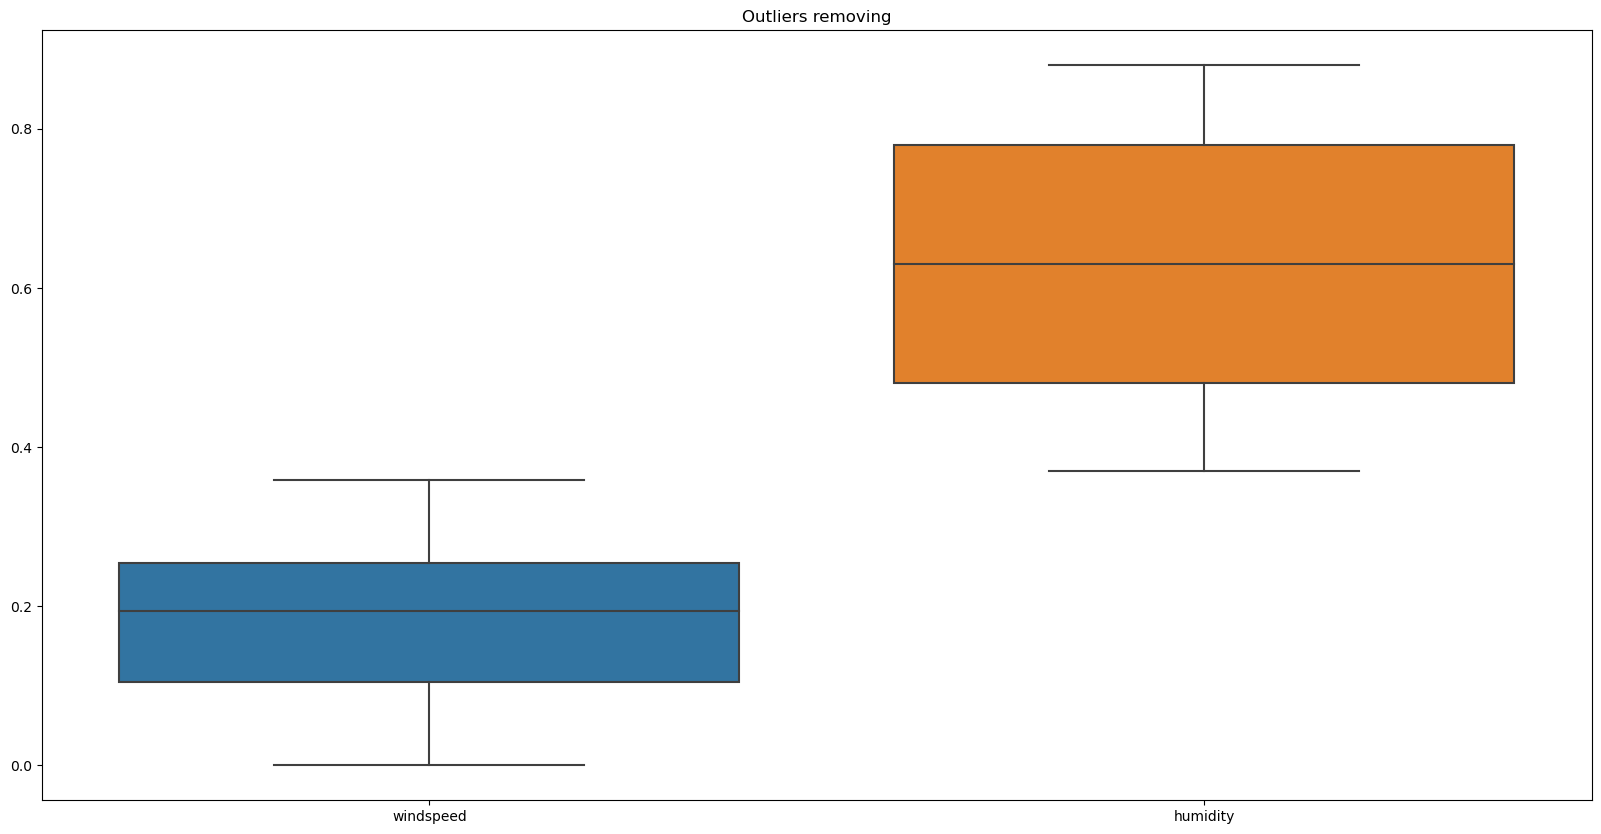

In [57]:
fig,ax=plt.subplots(figsize=(20,10))
sns.boxplot(data=df_capping_1[['windspeed', 'humidity']])
ax.set_title('Outliers removing')
plt.show()

 ##### IQR
 
One common technique to detect outliers is using IQR (interquartile range). In specific, IQR is the middle 50% of data, which is Q3-Q1. Q1 is the first quartile, Q3 is the third quartile, and quartile divides an ordered dataset into 4 equal-sized groups. In Python, we can use percentile function in NumPy package to find Q1 and Q3.

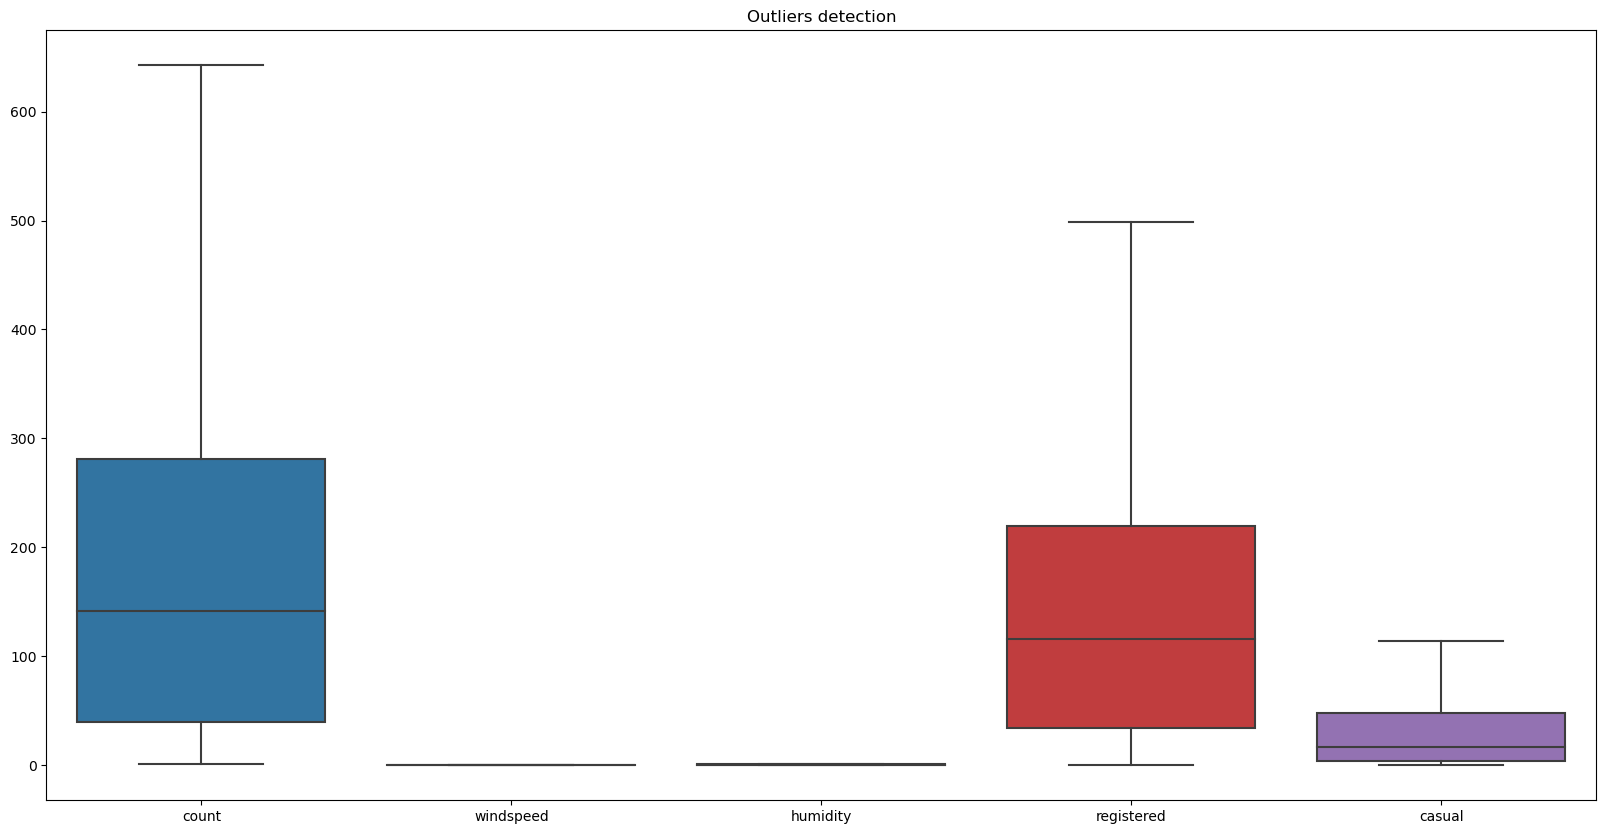

In [58]:
df_IQR = df_data_encoded.copy()

for col in col_outliers:
    q1 = np.percentile(df_IQR[col], 25)
    q3 = np.percentile(df_IQR[col], 75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    df_IQR[col] = np.where(df_IQR[col] < lower_bound, lower_bound, df_IQR[col])
    df_IQR[col] = np.where(df_IQR[col] > upper_bound, upper_bound, df_IQR[col])

boxplot_outliers(df_IQR)


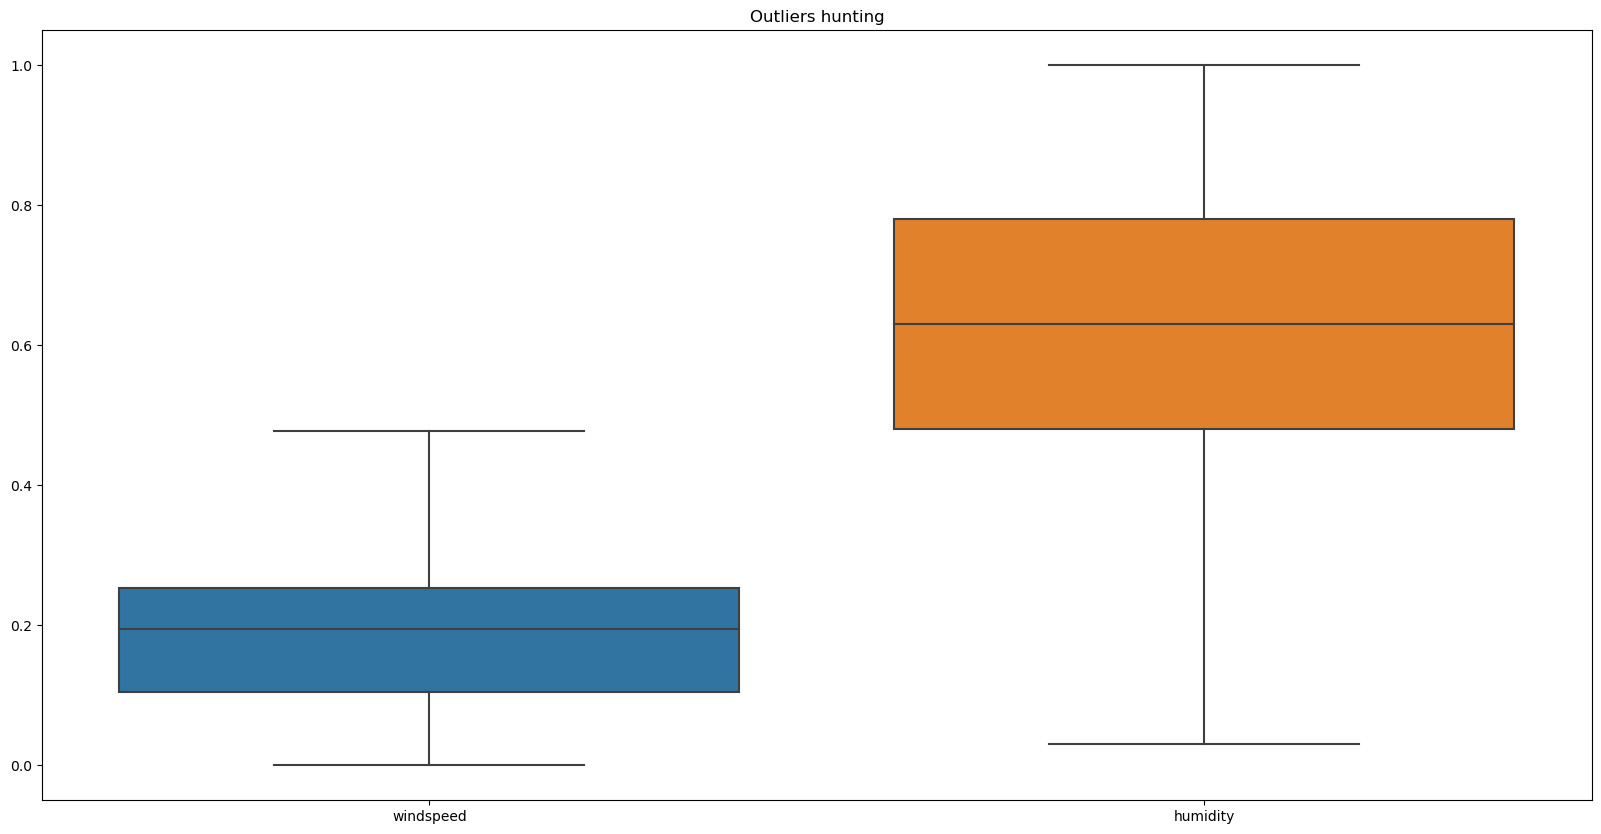

In [59]:
fig,ax=plt.subplots(figsize=(20,10))
sns.boxplot(data=df_IQR[['windspeed', 'humidity']])
ax.set_title('Outliers hunting')
plt.show()

#### Conclusion:

If we observe that for the Methods IQR, capping with 0.1 and Winsorizing,  datset is completely outlier free. 
Now to determine the best method, let us implement sample random regressor and find the efficiency for both data sets.

In [60]:
def random_regressor(df, target_col):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df.drop(target_col, axis=1), df[target_col], test_size=0.25, random_state=42)
    
    # Fit a random forest regressor model
    model = RandomForestRegressor(n_estimators=10, random_state=0)
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate R-squared to evaluate model performance
    r2 = r2_score(y_test, y_pred)
    
    return r2


In [61]:
df_IQR.dtypes

id                     int64
datetime      datetime64[ns]
season                 int32
year                   int32
month                  int64
hour                   int64
holiday                int32
weekday                int64
workingday             int32
weather                int32
temp                 float64
atemp                float64
humidity             float64
windspeed            float64
casual               float64
registered           float64
count                float64
dtype: object

In [62]:
target_col = 'count'
cols = ['season','year','month','hour','holiday','weekday','workingday','weather','temp','humidity','registered', 'casual', 'count','windspeed']


# R2 score for IQR dataset
r2 = random_regressor(df_IQR[cols], target_col)
print(f"R-squared score for IQR dataset: {r2}")

# R2 score for capping dataset
r2 = random_regressor(df_capping_1[cols], target_col)
print(f"R-squared score for capping with 0.1 dataset: {r2}")

# R2 score for winsorize dataset
r2 = random_regressor(df_winsorize_cus[cols], target_col)
print(f"R-squared score for winsorize dataset: {r2}")



R-squared score for IQR dataset: 0.9966736587694858
R-squared score for capping with 0.1 dataset: 0.9959245910610649
R-squared score for winsorize dataset: 0.9965980408843158


In [63]:
# from the above observations
# we can see that R2 is similar to all methods we performed. 
# we are Considering IQR for easy interpretability of usage


df_data_cleaned = df_IQR.copy()

In [64]:
df_data_cleaned

,id,datetime,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,2,1,1,0,1,6,1,1,0.24,0.2879,0.81,0.0000,3.0,13.0,16.0
1,2,2011-01-01,2,1,1,1,1,6,1,1,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0
3,4,2011-01-01,2,1,1,3,1,6,1,1,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0
4,5,2011-01-01,2,1,1,4,1,6,1,1,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0
5,6,2011-01-01,2,1,1,5,1,6,1,4,0.24,0.2576,0.75,0.0896,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17370,17371,2012-12-31,2,2,12,15,1,1,2,4,0.28,0.2879,0.45,0.1343,69.0,246.0,315.0
17373,17374,2012-12-31,2,2,12,18,1,1,2,4,0.26,0.2727,0.48,0.1343,10.0,112.0,122.0
17374,17375,2012-12-31,2,2,12,19,1,1,2,4,0.26,0.2576,0.60,0.1642,11.0,108.0,119.0
17375,17376,2012-12-31,2,2,12,20,1,1,2,4,0.26,0.2576,0.60,0.1642,8.0,81.0,89.0


In [73]:
# The following variable can be removed from furthur analysis
#datetime: since we already have seperate columns for 'year' and 'month'
# Just  Extracting date from the datetime column and eleiminating datetime column

In [65]:

df_data_cleaned['date'] = pd.to_datetime(df_data_cleaned['datetime']).dt.day

df_data_cleaned

,id,datetime,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date
0,1,2011-01-01,2,1,1,0,1,6,1,1,0.24,0.2879,0.81,0.0000,3.0,13.0,16.0,1
1,2,2011-01-01,2,1,1,1,1,6,1,1,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0,1
3,4,2011-01-01,2,1,1,3,1,6,1,1,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0,1
4,5,2011-01-01,2,1,1,4,1,6,1,1,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0,1
5,6,2011-01-01,2,1,1,5,1,6,1,4,0.24,0.2576,0.75,0.0896,0.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17370,17371,2012-12-31,2,2,12,15,1,1,2,4,0.28,0.2879,0.45,0.1343,69.0,246.0,315.0,31
17373,17374,2012-12-31,2,2,12,18,1,1,2,4,0.26,0.2727,0.48,0.1343,10.0,112.0,122.0,31
17374,17375,2012-12-31,2,2,12,19,1,1,2,4,0.26,0.2576,0.60,0.1642,11.0,108.0,119.0,31
17375,17376,2012-12-31,2,2,12,20,1,1,2,4,0.26,0.2576,0.60,0.1642,8.0,81.0,89.0,31


<Axes: >

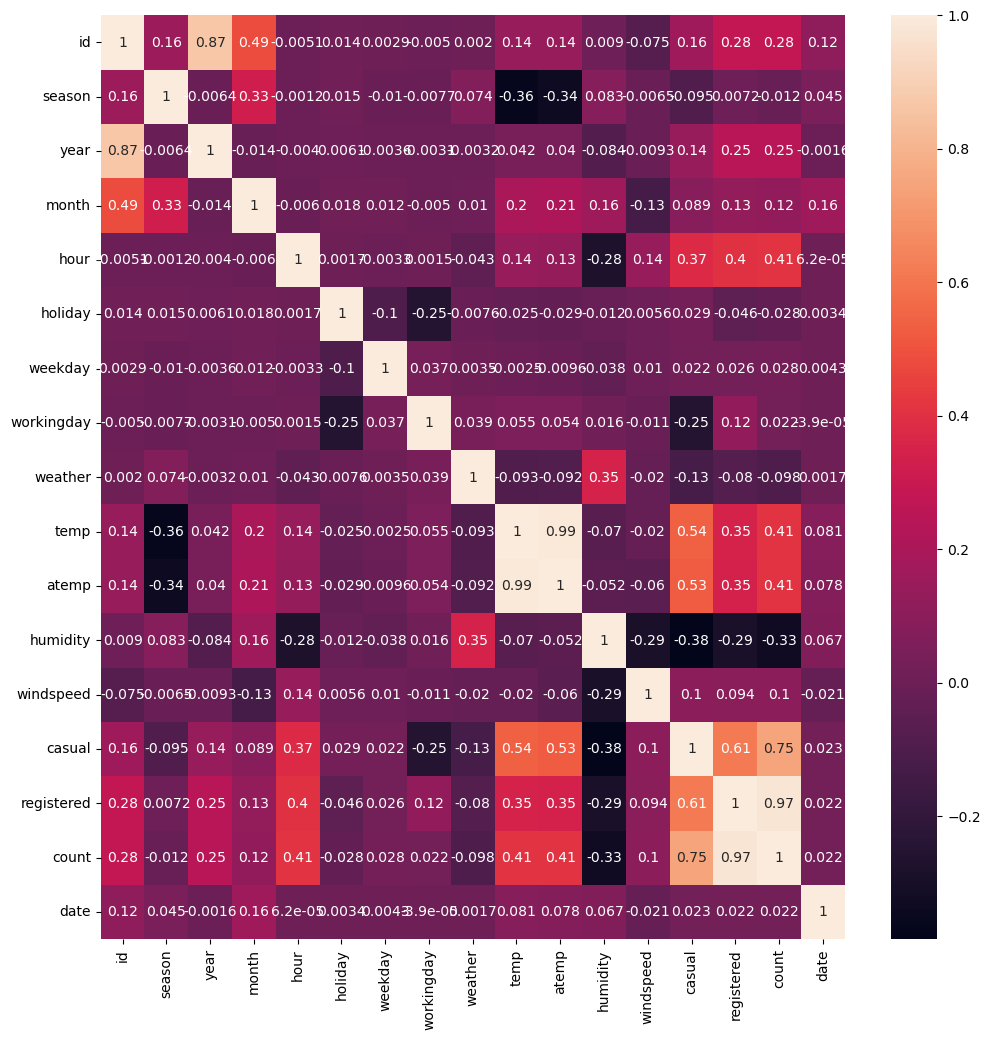

In [66]:
plt.figure(figsize=(12,12))
a = df_data_cleaned.corr()
sns.heatmap(a,annot = True)

In [67]:
df_data_cleaned.head()

,id,datetime,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date
0,1,2011-01-01,2,1,1,0,1,6,1,1,0.24,0.2879,0.81,0.0000,3.0,13.0,16.0,1
1,2,2011-01-01,2,1,1,1,1,6,1,1,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0,1
3,4,2011-01-01,2,1,1,3,1,6,1,1,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0,1
4,5,2011-01-01,2,1,1,4,1,6,1,1,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0,1
5,6,2011-01-01,2,1,1,5,1,6,1,4,0.24,0.2576,0.75,0.0896,0.0,1.0,1.0,1


## FEATURE ENGINEERING:

In [68]:
#id: Its only an id and hence we can remove that as it won't play any imp role
#datetime : This has the date, since we already have seperate columns for 'year' and 'month'
df_data_cleaned.drop(['id', 'datetime'], axis = 1, inplace=True)


In [69]:
df_data_cleaned

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date
0,2,1,1,0,1,6,1,1,0.24,0.2879,0.81,0.0000,3.0,13.0,16.0,1
1,2,1,1,1,1,6,1,1,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0,1
3,2,1,1,3,1,6,1,1,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0,1
4,2,1,1,4,1,6,1,1,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0,1
5,2,1,1,5,1,6,1,4,0.24,0.2576,0.75,0.0896,0.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17370,2,2,12,15,1,1,2,4,0.28,0.2879,0.45,0.1343,69.0,246.0,315.0,31
17373,2,2,12,18,1,1,2,4,0.26,0.2727,0.48,0.1343,10.0,112.0,122.0,31
17374,2,2,12,19,1,1,2,4,0.26,0.2576,0.60,0.1642,11.0,108.0,119.0,31
17375,2,2,12,20,1,1,2,4,0.26,0.2576,0.60,0.1642,8.0,81.0,89.0,31


### feature selection

Feature selection is the process where you automatically or manually select the features that contribute the most to your prediction variable or output. Having irrelevant features in your data can decrease the accuracy of the machine learning models.


Following are the different differnet Approches to perform feature selection:
    
- Recurrsive Feature Elimination (RFE)
- Mutual Information (MI) 
- L1 Regularization (Lasso)
- Variance Inflation Factor(VIF)
- Tree Based Feature Selection

after performing all the methods we will choose best method by using simple RandomRegressor

#### Recursive Feature Elimination (RFE):
 
- Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or      features) until the specified number of features is reached.

In [70]:
from sklearn.feature_selection import RFE

# copy a set from df_data_cleaned

df_data_RFE = df_data_cleaned.copy()

# Separate the features and target variable
X = df_data_RFE.drop('count', axis=1)
y = df_data_RFE['count']
target_col = 'count'

# Create a RandomForestRegressor model
model = RandomForestRegressor()

rfe = RFE(estimator=model)
rfe.fit(X, y)
# Get the indices of the selected features
selected_indices = rfe.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_indices]
data_RFE = pd.concat([X[selected_features],y], axis = 1)
print(selected_features)


Index(['month', 'hour', 'atemp', 'humidity', 'casual', 'registered', 'date'], dtype='object')


#### Mutual Information (MI):

- Mutual Information estimates mutual information for fixed categories like in a classification problem or a continuous target variable in regression problems. Mutual Information works on the entropy of the variables.

- Mutual information(MI)between two random variables is a non-negative value,which measures the dependency between the variables .It is equal to zero if and only if two random variables are independent ,and higher values mean higher dependency


In [71]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

# copy a set from df_data_cleaned

df_data_MI = df_data_cleaned.copy()

# Separate the features and target variable
X = df_data_MI.drop('count', axis=1)
y = df_data_MI['count']
target_col = 'count'

selector = SelectKBest(mutual_info_regression)
selector.fit_transform(X, y)
# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)
# Get the names of the selected features
selected_features = X.columns[selected_indices]
data_MI = pd.concat([X[selected_features],y], axis = 1)

print(selected_features)  

Index(['season', 'year', 'month', 'hour', 'temp', 'atemp', 'humidity',
       'casual', 'registered', 'date'],
      dtype='object')


#### L1 regularization:

also known as Lasso regularization, Since each non-zero coefficient adds to the penalty, it forces weak features to have zero as coefficients. Thus L1 regularization produces sparse solutions, inherently performing feature selection.

In [72]:

import numpy as np
from sklearn.linear_model import LassoCV, Lasso
from sklearn.datasets import make_regression

# copy a set from df_data_cleaned

df_data_LASSO = df_data_cleaned.copy()

# Separate the features and target variable
X = df_data_LASSO.drop('count', axis=1)
y = df_data_LASSO['count']
target_col = 'count'

#determine the best alpha using cross validation
# create a range of alpha values to test
alphas = np.logspace(-3, 1, 100)
# create a LassoCV object with cross-validation
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42)
# fit the LassoCV model
lasso_cv.fit(X, y)

# print the best alpha value
print("Best alpha:", lasso_cv.alpha_)


Best alpha: 0.29150530628251786


#### Conclusion:
We can observe from above  that the best alpha for perfroming the lasso is 0.2915

In [73]:
# Now we will perfrom actual lasso with obtained alpha value and get best features in the data set

# copy a set from df_data_cleaned

df_data_lasso = df_data_cleaned.copy()

# Separate the features and target variable
X = df_data_lasso.drop('count', axis=1)
y = df_data_lasso['count']
target_col = 'count'

# Create a Lasso model
model = Lasso(alpha=0.29)

# Fit the Lasso model on the data
model.fit(X, y)

# Get the coefficients of the features
coef = pd.Series(model.coef_, index=X.columns)

# Get the names of the selected features
selected_features = coef[coef.abs() > 0].index
print(selected_features)



Index(['season', 'year', 'month', 'hour', 'weekday', 'workingday', 'casual',
       'registered', 'date'],
      dtype='object')


#### Conclusion:
we can observe that with the alpha value as 0.29,number of selected features are 9.

#### Variance Inflation Factor :

- Variance Inflation Factor (VIF) is used to detect the presence of multicollinearity. Variance inflation factors (VIF) measure how much the variance of the estimated regression coefficients are inflated as compared to when the predictor variables are not linearly related.

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_data_VIF = df_data_cleaned.copy()
target_variable = 'count'

X = df_data_VIF.drop(columns=[target_variable])

# Compute the VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


# Print the features sorted by their VIF value in descending order
print(vif.sort_values(by='VIF', ascending=False)['Feature'])


9          atemp
8           temp
4        holiday
10      humidity
6     workingday
1           year
0         season
2          month
12        casual
3           hour
13    registered
14          date
11     windspeed
7        weather
5        weekday
Name: Feature, dtype: object


#### Conclusion:

from above we can concentrate on season, year, month, hr, holiday, weekday, workingday, weather condition, temp/atemp, registered, casual because Based on VIF we can conclude that the features with LOW VIF can be used for modeling


#### Tree Based Feature Selection: 

- The tree-based feature selection has been gaining increasing attention recently. It has the advantages of high accuracy, good robustness and ease of using which makes it not only one of the most popular machine learning algorithms but also a commonly used feature selection method.

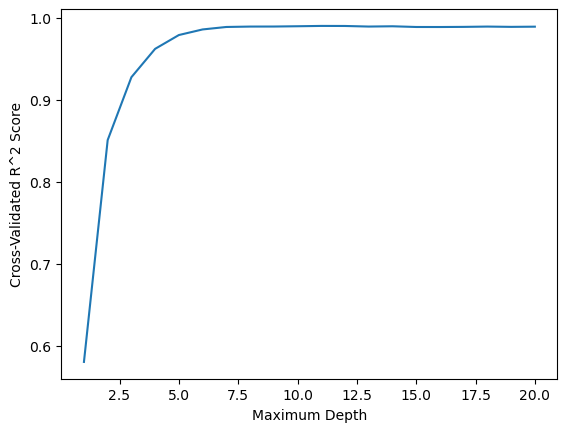

Best Maximum Depth: 11
Corresponding Cross-Validated R^2 Score: 0.990366484595738


In [75]:
# for Decision tree feature selection method we required max depth parameter
#Now to get best max_depth we can use cross-validation technique and then we can use that best max_depth

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

# Split the dataset into features (X) and target (y)
X = df_data_cleaned.drop(columns=[target_variable])
y = df_data_cleaned[target_variable]

# Create a decision tree regressor
tree = DecisionTreeRegressor()

# Define the range of maximum depths to test
max_depths = np.arange(1, 21)

# Compute the cross-validated R^2 scores for each maximum depth
scores = [cross_val_score(tree.set_params(max_depth=max_depth), X, y, cv=5, scoring='r2').mean() for max_depth in max_depths]

# Plot the cross-validated R^2 scores vs. maximum depth
import matplotlib.pyplot as plt
plt.plot(max_depths, scores)
plt.xlabel('Maximum Depth')
plt.ylabel('Cross-Validated R^2 Score')
plt.show()

# Print the best maximum depth and the corresponding score
best_index = np.argmax(scores)
best_max_depth = max_depths[best_index]
best_score = scores[best_index]
print(f'Best Maximum Depth: {best_max_depth}')
print(f'Corresponding Cross-Validated R^2 Score: {best_score}')

In [76]:
#Based on the CV method we can say that best max_depth is 14. 
#So let us use that and implement Tree based feature Selection

from sklearn.feature_selection import SelectFromModel

# Split the dataset into features (X) and target (y)
X = df_data_cleaned.drop(columns=[target_variable])
y = df_data_cleaned[target_variable]

# Create a decision tree regressor with optimal maximum depth
tree = DecisionTreeRegressor(max_depth=3)

# Perform feature selection using a decision tree model
selector = SelectFromModel(tree)
selector.fit(X, y)

# Print the selected features
selected_features = X.columns[selector.get_support()]
print(selected_features)

Index(['registered'], dtype='object')


In [76]:
selected_features = ['season', 'month', 'hour', 'weekday', 'workingday', 'registered', 'casual', 'date', 'weather', 'count']

df_data_featureSelected = df_data_cleaned[selected_features]
df_data_featureSelected

,season,month,hour,weekday,workingday,registered,casual,date,weather,count
0,2,1,0,6,1,13.0,3.0,1,1,16.0
1,2,1,1,6,1,32.0,8.0,1,1,40.0
3,2,1,3,6,1,10.0,3.0,1,1,13.0
4,2,1,4,6,1,1.0,0.0,1,1,1.0
5,2,1,5,6,1,1.0,0.0,1,4,1.0
...,...,...,...,...,...,...,...,...,...,...
17370,2,12,15,1,2,246.0,69.0,31,4,315.0
17373,2,12,18,1,2,112.0,10.0,31,4,122.0
17374,2,12,19,1,2,108.0,11.0,31,4,119.0
17375,2,12,20,1,2,81.0,8.0,31,4,89.0


### One Hot Encoding

Categorical Columns Encoding

In [77]:
# Performing the oneHot Encoding for the categorical columns in features selected
from sklearn.preprocessing import OneHotEncoder
df_data_oneHot = df_data_featureSelected.copy()

cat_selected_features = ['season', 'month', 'weekday', 'workingday', 'weather']
onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
onehot_encoder.fit(df_data_oneHot[cat_selected_features])
encoded_cols = onehot_encoder.transform(df_data_oneHot[cat_selected_features])

# Add the encoded columns to the dataset
encoded_cols_df = pd.DataFrame(encoded_cols, columns=onehot_encoder.get_feature_names_out(cat_selected_features))
df_data_oneHot = pd.concat([df_data_oneHot, encoded_cols_df], axis=1)

# Drop the original categorical columns
df_data_oneHot.drop(cat_selected_features, axis=1, inplace=True)
df_data_oneHot.dropna(axis=0, inplace=True)
df_data_oneHot



,hour,registered,casual,date,count,season_1,season_2,season_3,season_4,month_1,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,workingday_2,weather_1,weather_2,weather_3,weather_4
0,0.0,13.0,3.0,1.0,16.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1.0,32.0,8.0,1.0,40.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,3.0,10.0,3.0,1.0,13.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,4.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
5,5.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17334,3.0,14.0,1.0,30.0,15.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
17335,4.0,7.0,0.0,30.0,7.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
17336,5.0,2.0,0.0,30.0,2.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
17337,6.0,7.0,1.0,30.0,8.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


Splitting dataset:

In [78]:
# Splitting dataset

X_train, X_test, y_train, y_test = train_test_split(df_data_oneHot.drop('count', axis=1), df_data_oneHot['count'], test_size=0.2, random_state=42)

### Feature Scalling:

Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.


We have 2 methods for scalling the features:

1. Min-Max Scalling: Also known as min-max normalization, it is the simplest method and consists of rescaling the range of features to scale the range in   [0, 1]. 

2. Standardscalling: StandardScaler is the industry's go-to algorithm. StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.






In [89]:
# we will perfrom both methods and use Random Regressor to get R2 value and finalise the method.

In [79]:
#  Min-Max Scalling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Perform min-max scaling on the training data
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)

# Train a SimpleRandomRegressor on the min-max scaled training data
model_minmax = RandomForestRegressor()
model_minmax.fit(X_train_minmax, y_train)

# Apply the same min-max scaling to the test data
X_test_minmax = scaler_minmax.transform(X_test)

# Evaluate the performance of the model on the test data
y_pred_minmax = model_minmax.predict(X_test_minmax)
r2_minmax = r2_score(y_test, y_pred_minmax)


print("R-squared score for min-max scaled data:", r2_minmax)

R-squared score for min-max scaled data: 0.9962623316516196


In [80]:
# Standard Scalling

# Perform standard scaling on the training data
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)

# Train a SimpleRandomRegressor on the standard scaled training data
model_std = RandomForestRegressor()
model_std.fit(X_train_std, y_train)

# Apply the same standard scaling to the test data
X_test_std = scaler_std.transform(X_test)

# Evaluate the performance of the model on the test data
y_pred_std = model_std.predict(X_test_std)
r2_std = r2_score(y_test, y_pred_std)


print("R-squared score for standard scaled data:", r2_std)



R-squared score for standard scaled data: 0.9962687689039763


In [81]:

# Compare the performance of the two models
print('min-max scaller')
print("R-squared score for min-max scaled data:", r2_minmax)
print('------------------------')
print('standard scaller')
print("R-squared score for standard scaled data:", r2_std)


min-max scaller
R-squared score for min-max scaled data: 0.9962623316516196
------------------------
standard scaller
R-squared score for standard scaled data: 0.9962687689039763


#### Conclusion:

from above can say that both methods are best for our dataset. 
we have narrow range of values then we we can consider using standardScaler.



In [82]:
#shape of train and test data
print(X_train_std.shape)
print(y_train.shape)
print(X_test_std.shape)
print(y_test.shape)

(13844, 33)
(13844,)
(3462, 33)
(3462,)


In [83]:
X_train_std



array([[ 1.65429898, -0.48933845, -0.23770163, ..., -0.01202031,
        -0.2945191 , -0.59270002],
       [ 0.64037988,  0.82201094,  0.99658112, ..., -0.01202031,
        -0.2945191 , -0.59270002],
       [-0.80807599, -0.5482755 , -0.86919513, ..., -0.01202031,
        -0.2945191 , -0.59270002],
       ...,
       [-1.09776717, -1.03450617, -0.89789938, ..., -0.01202031,
        -0.2945191 , -0.59270002],
       [ 1.65429898, -1.03450617, -0.81178663, ..., -0.01202031,
        -0.2945191 ,  1.68719414],
       [-1.67714951, -0.62194681, -0.72567388, ..., -0.01202031,
        -0.2945191 ,  1.68719414]])

### Model Building:

### RandomForest Regressor Model

In [84]:
# RandomForest Regressor 

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Create the GridSearchCV object
rf_model = RandomForestRegressor(random_state=42)

# Fit the model
rf_model.fit(X_train_std, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_std)

# calculate R2
r2_test = r2_score(y_test, y_pred)
print('r2 score for test data set: ',r2_test)

#calculate r2 for train set
y_train_pred = rf_model.predict(X_train_std)
r2_train = r2_score(y_train, y_train_pred)
print('R^2 score for training set: ', r2_train)

# Get model scores for both test and train sets

train = rf_model.score(X_train_std, y_train)
test = rf_model.score(X_test_std, y_test)
print('Model Score for train data: ', train)
print('Model Score for Test data: ', test)

r2 score for test data set:  0.9963756164572799
R^2 score for training set:  0.9994931884640043
Model Score for train data:  0.9994931884640043
Model Score for Test data:  0.9963756164572799


### DecisionTree Regressor Model

In [86]:
#decision tree



from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
# fit the regressor with X_train_std and y_train
dt_model.fit(X_train_std, y_train)

# predict on the test set
y_pred = dt_model.predict(X_test_std)

# calculate R^2 score for training set
y_train_pred = dt_model.predict(X_train_std)
r2_train = r2_score(y_train, y_train_pred)
print('R^2 score for training set:', r2_train)

# calculate R^2 score for test set
r2_test = r2_score(y_test, y_pred)
print('R^2 score for test set:', r2_test)

# Get model scores for both test and train sets

train = dt_model.score(X_train_std, y_train)
test = dt_model.score(X_test_std, y_test)
print('Model Score for train data: ', train)
print('Model Score for Test data: ', test)

R^2 score for training set: 0.9999970273753803
R^2 score for test set: 0.9933599458067413
Model Score for train data:  0.9999970273753803
Model Score for Test data:  0.9933599458067413


In [87]:
pip install xgboost



  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/75/dd/9afe0d9d0f61a5384c3932626a022e38c396a5d88e6f5345ad2f7b576747/xgboost-1.7.6-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/70.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/70.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/70.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/70.9 MB 186.2 kB/s eta 0:06:21
   ---------------------------------------- 0.0/70.9 MB 186.2 kB/s eta 0:06:21
   ---------------------------------------- 0.0/70.9 MB 186.2 kB/s eta 0:06:21
   ---------------------------------------- 0.0/70.9 MB 186.2 kB/s eta 0:06:21
   ---------------------------------------- 0.0/70.9 MB 186.2 kB/s eta 0:06:21
   ---------------------------------------- 0.0/70.9 MB 186.2 kB/s eta 0:06:21
   ---------------------------------------- 0.0/70.9 MB 89.3 kB/s eta 0:13:14
   -----------------------------

### XGboost

In [87]:
# XGboost


import xgboost as xgb

# Define the XGBoost model and set hyperparameters

xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=150,
    max_depth=30,
    learning_rate=0.05,
    subsample=0.7,
    colsample_bytree=0.8
)

# Train the XGBoost model on the standardized training data
xgb_model.fit(X_train_std, y_train)

# Make predictions on the standardized test data
y_pred = xgb_model.predict(X_test_std)

# calculate R^2 score for training set
y_train_pred = xgb_model.predict(X_train_std)
r2_train = r2_score(y_train, y_train_pred)
print('R^2 score for training set:', r2_train)

# calculate R^2 score for test set
r2_test = r2_score(y_test, y_pred)
print('R^2 score for test set:', r2_test)

# Get model scores for both test and train sets

train = xgb_model.score(X_train_std, y_train)
test = xgb_model.score(X_test_std, y_test)
print('Model Score for train data: ', train)
print('Model Score for Test data: ', test)

R^2 score for training set: 0.9999222463125381
R^2 score for test set: 0.9968185341142912
Model Score for train data:  0.9999222463125381
Model Score for Test data:  0.9968185341142912


In [89]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the XGBRegressor model
xgb_model = xgb.XGBRegressor()

# Define the hyperparameter grid to search over
params = {
    "max_depth": [ 4, 5, 8],
    "learning_rate": [0.1],
    "n_estimators": [300, 500, 700]
}

# Initialize the GridSearchCV object with 5-fold cross-validation
xgb_grid = GridSearchCV(estimator=xgb_model, param_grid=params, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
xgb_grid.fit(X_train_std, y_train)
# Make predictions on the standardized test data
y_pred = xgb_grid.predict(X_test_std)

# calculate R^2 score for training set
y_train_pred = xgb_grid.predict(X_train_std)
r2_train_xgb = r2_score(y_train, y_train_pred)
print('R^2 score for training set:', r2_train_xgb)

# calculate R^2 score for test set
r2_test_xgb = r2_score(y_test, y_pred)
print('R^2 score for test set:', r2_test_xgb)

# Get model scores for both test and train sets

# Print the best hyperparameters and the corresponding mean test score
print("Best hyperparameters:", xgb_grid.best_params_)
train_xgb = xgb_grid.score(X_train_std, y_train)
test_xgb = xgb_grid.score(X_test_std, y_test)
print('Model Score for train data: ', train_xgb)
print('Model Score for Test data: ', test_xgb)

R^2 score for training set: 0.9986792934425391
R^2 score for test set: 0.9970846921704682
Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 500}
Model Score for train data:  0.9986792934425391
Model Score for Test data:  0.9970846921704682


### SVR

In [90]:
#SVR


from sklearn.svm import SVR

# Train an SVR model
svr_model = SVR(kernel='rbf', C=1, gamma='scale', epsilon=0.1) # taking default values
svr_model.fit(X_train_std, y_train)

# predict on the test set
y_pred = svr_model.predict(X_test_std)

# calculate R^2 score for training set
y_train_pred = svr_model.predict(X_train_std)
r2_train = r2_score(y_train, y_train_pred)
print('R^2 score for training set:', r2_train)

# calculate R^2 score for test set
r2_test = r2_score(y_test, y_pred)
print('R^2 score for test set:', r2_test)

# Get model scores for both test and train sets

train = svr_model.score(X_train_std, y_train)
test = svr_model.score(X_test_std, y_test)
print('Model Score for train data: ', train)
print('Model Score for Test data: ', test)


R^2 score for training set: 0.8710996200495477
R^2 score for test set: 0.8722275666771314
Model Score for train data:  0.8710996200495477
Model Score for Test data:  0.8722275666771314


### KNeighborsRegressor

In [92]:
#KNN



from sklearn.neighbors import KNeighborsRegressor

# Train a KNN regression model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_std, y_train)

# predict on the test set
y_pred = knn_model.predict(X_test_std)

# calculate R^2 score for training set
y_train_pred = knn_model.predict(X_train_std)
r2_train = r2_score(y_train, y_train_pred)
print('R^2 score for training set:', r2_train)

# calculate R^2 score for test set
r2_test = r2_score(y_test, y_pred)
print('R^2 score for test set:', r2_test)

# Get model scores for both test and train sets

train = knn_model.score(X_train_std, y_train)
test = knn_model.score(X_test_std, y_test)
print('Model Score for train data: ', train)
print('Model Score for Test data: ', test)

R^2 score for training set: 0.9426290108836414
R^2 score for test set: 0.8927992759865775
Model Score for train data:  0.9426290108836414
Model Score for Test data:  0.8927992759865775


In [93]:
print("Best hyperparameters:", xgb_grid.best_params_)
print('R^2 score for training set:', r2_train_xgb)
print('R^2 score for test set:', r2_test_xgb)
print('Model Score for train data: ', train_xgb)
print('Model Score for Test data: ', test_xgb)

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 500}
R^2 score for training set: 0.9986792934425391
R^2 score for test set: 0.9970846921704682
Model Score for train data:  0.9986792934425391
Model Score for Test data:  0.9970846921704682


In [94]:
# let us create a X_train and y_train after feature selection for the use of pipeline and deployment

X_train_p, X_test_p, y_train, y_test = train_test_split(df_data_featureSelected.drop('count', axis=1), df_data_featureSelected['count'], test_size=0.2, random_state=42)

In [95]:
X_train_p

,season,month,hour,weekday,workingday,registered,casual,date,weather
1412,2,3,3,5,2,1.0,0.0,3,4
16961,4,12,12,5,2,244.0,29.0,14,1
13667,1,7,16,6,1,279.0,114.0,28,1
12695,3,6,4,1,2,9.0,0.0,18,4
14504,1,9,13,6,1,267.0,114.0,9,4
...,...,...,...,...,...,...,...,...,...
11300,3,4,1,6,1,64.0,24.0,21,1
11980,3,5,9,6,1,213.0,79.0,19,1
5406,1,8,4,4,2,9.0,0.0,18,1
876,2,2,23,2,2,9.0,3.0,2,1


### Deployement

In [100]:
# Creating a pipeline for the preprocessing, scalling, modeling etc..


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib



# Define the column transformer for the categorical features
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(transformers=[('cat', categorical_transformer, ['season', 'month', 'weekday', 'workingday', 'weather'])],
                                 remainder='passthrough')


# Define the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('scaler', StandardScaler(with_mean=False)),
                           ('regressor', xgb.XGBRegressor(learning_rate=0.1, max_depth=4, n_estimators=500))])

# Fit the pipeline on the training data
pipeline.fit(X_train_p, y_train)

# Save model to disk
filename = 'model2.pkl'
joblib.dump(pipeline, filename)

['model2.pkl']

In [102]:
import sklearn.external.joblib as joblib
import joblib


ModuleNotFoundError: No module named 'sklearn.external'

In [97]:
import streamlit as st

import joblib
import pandas as pd

# Load the model pkl file
model = joblib.load('model2.pkl')

# functions to make predictions
def predict(model, input_df):
    """Make predictions using the trained model."""
    predictions = model.predict(input_df)
    return predictions

# create a form for the user input
def input_form():
    """Display the input form and receive user input."""
    # Define the input fields
    season_options = {1: 'fall', 2: 'springer', 3: 'summer', 4: 'winter'}
    season = st.selectbox('Season', options=list(season_options.values()))
    
    weekday_options = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
    weekday = st.selectbox('Day of Week', options=list(weekday_options.values()))

    workingday_options = {1: 'No work', 2: 'Working Day'}
    workingday = st.selectbox('Working Day', options=list(workingday_options.values()))
    
    weather_condition_options = {1: 'Clear', 2: 'Heavy Rain', 3: 'Light Snow', 4: 'Mist'}
    weather = st.selectbox('Weather Condition', options=list(weather_condition_options.values()))

    month = st.selectbox('Month', range(1, 13))
    hour = st.slider('Hour', 0, 23, 12)
    registered = st.number_input('Registered Users', value=0)
    casual = st.number_input('Casual Users', value=0)
    date = st.slider('Date', 1, 31, 10)

    # Combine the input fields into a DataFrame
    input_dict = {'season': season,
                  'month': month,
                  'hour': hour,
                  'weekday': weekday,
                  'workingday': workingday,
                  'registered': registered,
                  'casual': casual,
                  'date': date,
                  'weather': weather}
    input_df = pd.DataFrame(input_dict, index=[0])

    return input_df


# streamlit app
def app():
    """Define the Streamlit app."""
    # Set the app title
    st.set_page_config(page_title="Bike Sharing Demand Prediction", page_icon=":bike:", layout="wide")
    #st.title('Bike Sharing Demand Prediction')


    # Add animation and color to title
    st.title('Bike Sharing Demand Prediction :bicyclist: :chart_with_upwards_trend:')
    st.markdown("<h3 style='text-align: center; color: #7E8C8D;'>Predict the number of bike rentals based on the given parameters</h3>", unsafe_allow_html=True)
    st.text("")
    st.text("")
    st.text("")

    # Add legend
    st.sidebar.markdown("<h4 style='text-align: center; color: #7E8C8D;'>Legend :mag:</h4>", unsafe_allow_html=True)
    st.sidebar.markdown("- Season :leaves:: 1: 'fall', 2: 'springer', 3: 'summer', 4: 'winter'", unsafe_allow_html=True)
    st.sidebar.markdown("- Working Day :hammer_and_wrench:: 1: 'No work', 2: 'Working Day'", unsafe_allow_html=True)
    st.sidebar.markdown("- Weather  :cloud:: 1: 'Clear', 2: 'Heavy Rain', 3: 'Light Snow', 4: 'Mist'", unsafe_allow_html=True)
    
    # Get the user input
    input_df = input_form()
# Add a predict button
    predict_button = st.button('Predict')

# If the predict button is clicked, make a prediction and display it
    if predict_button:
    # Make a prediction
        predictions = predict(model, input_df)

    # Display the prediction
        st.success(f'Predicted Bike Rentals: **{round(predictions[0]):,}**')

# Run the Streamlit app
if __name__ == '__main__':
    app()

2024-01-16 23:27:02.147 
  command:

    streamlit run C:\Users\sattyam\anaconda\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [97]:
!pip install streamlit

  Obtaining dependency information for streamlit from https://files.pythonhosted.org/packages/50/28/fdfe9711d553cfaf217cafc9b8ba21479c663b6504cc96652465b153e04b/streamlit-1.26.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for altair<6,>=4.0 from https://files.pythonhosted.org/packages/f2/b4/02a0221bd1da91f6e6acdf0525528db24b4b326a670a9048da474dfe0667/altair-5.1.1-py3-none-any.whl.metadata
  Using cached blinker-1.6.2-py3-none-any.whl (13 kB)
  Obtaining dependency information for cachetools<6,>=4.0 from https://files.pythonhosted.org/packages/a9/c9/c8a7710f2cedcb1db9224fdd4d8307c9e48cbddc46c18b515fefc0f1abbe/cachetools-5.3.1-py3-none-any.whl.metadata
  Obtaining dependency information for protobuf<5,>=3.20 from https://files.pythonhosted.org/packages/5e/46/5b9674a33cbf690ffdd79ab1863767a66461cd06ea7aeb9f90e4e50be7a5/protobuf-4.24.3-cp310-abi3-win_amd64.whl.metadata
  Using cached Pympler-1.0.1-py3-none-any.whl (164 kB)
  Obtaining dependency information for rich<14

In [99]:
import joblib